# 1 Installing the YOLOv8 Environment

To start off with YOLOv8 we first clone the YOLOv8 repository and install dependencies. This will set up our programming environment to be ready to running object detection training and inference commands.

In [1]:
# Clone repository
# !git clone https://github.com/ultralytics/ultralytics

# Navigate to the cloned directory
%cd ultralytics

# Install the package in editable mode for development
# !pip install -e .

C:\Users\CP1\Desktop\GLE-Billing\ultralytics


# 2 Import Libraries

In [2]:
import torch
print('torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))
from ultralytics import YOLO

import yaml
import glob
from IPython.display import Image, display
from IPython.core.magic import register_line_cell_magic

from DataAugmentation import DataAugmentation

torch 1.13.1+cu116 _CudaDeviceProperties(name='NVIDIA GeForce RTX 3090', major=8, minor=6, total_memory=24575MB, multi_processor_count=82)


In [3]:
%cd ..

# Open and read the YAML file
with open('configuration/config-GLE-row.yaml', 'r') as file:
    yaml_data = yaml.safe_load(file)

yaml_data

C:\Users\CP1\Desktop\GLE-Billing


{'path': 'C:/Users/CP1/Desktop/GLE-Billing/Row',
 'train': 'train.txt',
 'val': 'valid.txt',
 'nc': 1,
 'names': ['Row']}

In [4]:
# Define number of classes based on YAML
with open('configuration/config-GLE-row.yaml', 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

print(f'Number of class: {num_classes}')

Number of class: 1


In [5]:
import os

current_directory = os.getcwd()
print("Current Directory:", current_directory)

Current Directory: C:\Users\CP1\Desktop\GLE-Billing


# 3 Train YOLOv8

In [25]:
model = YOLO('yolov8s.pt')  # build a new model from scratch

results = model.train(data='configuration/config-GLE-row.yaml', epochs=1000, workers=1, imgsz=416)  # train the model

New https://pypi.org/project/ultralytics/8.2.64 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.62  Python-3.10.10 torch-1.13.1+cu116 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)
WARNING  Upgrade to torch>=2.0.0 for deterministic training.
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=configuration/config-GLE-row.yaml, epochs=1000, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=1, project=None, name=train14, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False,

train: Scanning configuration\Row\obj_train_data... 95 images, 0 backgrounds, 0 corrupt: 100%|██████████| 95/95 [00:00<00:00, 374.69it/s]

train: New cache created: configuration\Row\obj_train_data.cache



val: Scanning configuration\Row\obj_train_data... 5 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5/5 [00:00<00:00, 320.01it/s]

val: New cache created: configuration\Row\obj_train_data.cache


Plotting labels to runs\detect\train14\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 1 dataloader workers
Logging results to runs\detect\train14
Starting training for 1000 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     1/1000      1.92G       5.47      4.643      4.339        524        416: 100%|██████████| 6/6 [00:19<00:00,  3.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all          5         54    0.00441     0.0741     0.0024   0.000355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     2/1000      1.77G      5.285      4.176       3.98        544        416: 100%|██████████| 6/6 [00:01<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.00it/s]

                   all          5         54     0.0208      0.204     0.0111    0.00383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     3/1000      1.84G      4.124      2.241      2.515        586        416: 100%|██████████| 6/6 [00:01<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.97it/s]

                   all          5         54     0.0426      0.148     0.0196    0.00619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     4/1000      1.84G      3.551      1.862        2.1        594        416: 100%|██████████| 6/6 [00:00<00:00,  7.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.33it/s]

                   all          5         54      0.064      0.352     0.0482     0.0165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     5/1000      1.83G      2.992      1.608       1.84        634        416: 100%|██████████| 6/6 [00:00<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.73it/s]

                   all          5         54       0.14      0.852      0.142     0.0614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     6/1000      1.84G      2.615      1.448      1.686        508        416: 100%|██████████| 6/6 [00:00<00:00,  7.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.06it/s]

                   all          5         54      0.466      0.722      0.589      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     7/1000      1.85G        2.3      1.318      1.546        607        416: 100%|██████████| 6/6 [00:00<00:00,  7.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.14it/s]

                   all          5         54      0.386      0.687      0.451      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     8/1000      1.84G      2.206       1.27      1.441        625        416: 100%|██████████| 6/6 [00:00<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.74it/s]

                   all          5         54      0.607      0.515      0.603      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     9/1000      1.84G      2.074      1.256      1.438        610        416: 100%|██████████| 6/6 [00:00<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.96it/s]

                   all          5         54      0.398      0.741      0.548      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    10/1000      1.84G      2.038      1.213      1.436        567        416: 100%|██████████| 6/6 [00:00<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.09it/s]

                   all          5         54       0.74      0.789      0.783      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    11/1000      1.84G      1.959      1.178      1.419        537        416: 100%|██████████| 6/6 [00:00<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.56it/s]

                   all          5         54      0.739      0.788      0.768       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    12/1000      1.84G      1.962      1.201      1.334        473        416: 100%|██████████| 6/6 [00:00<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.19it/s]

                   all          5         54      0.719      0.722      0.712      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    13/1000      1.84G      1.858      1.209       1.32        442        416: 100%|██████████| 6/6 [00:00<00:00,  7.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.75it/s]

                   all          5         54      0.757      0.778       0.72      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    14/1000      1.84G      1.887      1.164      1.321        617        416: 100%|██████████| 6/6 [00:00<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.36it/s]

                   all          5         54      0.516      0.778      0.731      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    15/1000      1.84G      1.772      1.136      1.288        488        416: 100%|██████████| 6/6 [00:00<00:00,  8.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.53it/s]

                   all          5         54      0.629      0.796      0.807      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    16/1000      1.84G      1.754      1.144      1.291        516        416: 100%|██████████| 6/6 [00:00<00:00,  7.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.58it/s]

                   all          5         54      0.792      0.846      0.894       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    17/1000      1.84G       1.74      1.143      1.256        541        416: 100%|██████████| 6/6 [00:00<00:00,  8.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.72it/s]


                   all          5         54      0.809      0.863      0.926      0.394

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    18/1000      1.84G       1.75      1.131      1.247        522        416: 100%|██████████| 6/6 [00:00<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 31.48it/s]

                   all          5         54       0.63      0.796      0.799      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    19/1000      1.85G      1.593      1.103      1.208        476        416: 100%|██████████| 6/6 [00:00<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.33it/s]

                   all          5         54      0.689      0.778      0.814      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    20/1000      1.84G      1.675      1.131      1.216        513        416: 100%|██████████| 6/6 [00:00<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.32it/s]

                   all          5         54      0.845      0.815      0.873      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    21/1000      1.83G      1.638      1.099      1.161        539        416: 100%|██████████| 6/6 [00:00<00:00,  8.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.33it/s]

                   all          5         54      0.872      0.852       0.89      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    22/1000      1.84G      1.584      1.072       1.18        568        416: 100%|██████████| 6/6 [00:00<00:00,  8.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.42it/s]

                   all          5         54      0.715      0.815      0.823      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    23/1000      1.83G      1.548      1.066      1.147        555        416: 100%|██████████| 6/6 [00:00<00:00,  9.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.52it/s]

                   all          5         54      0.689      0.815      0.813       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    24/1000      1.84G      1.557      1.096      1.123        506        416: 100%|██████████| 6/6 [00:00<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.99it/s]

                   all          5         54      0.881      0.778      0.839      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    25/1000      1.84G        1.5      1.063      1.155        493        416: 100%|██████████| 6/6 [00:00<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.95it/s]

                   all          5         54      0.909      0.778      0.857      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    26/1000      1.83G       1.53      1.046      1.146        481        416: 100%|██████████| 6/6 [00:00<00:00,  8.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.04it/s]

                   all          5         54      0.885      0.713      0.843      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    27/1000      1.84G      1.545      1.057      1.137        579        416: 100%|██████████| 6/6 [00:00<00:00,  8.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all          5         54      0.881      0.722      0.857       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    28/1000      1.83G      1.702      1.123      1.128        502        416: 100%|██████████| 6/6 [00:00<00:00,  8.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.77it/s]

                   all          5         54      0.876      0.833      0.931      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    29/1000      1.84G       1.58      1.086      1.097        624        416: 100%|██████████| 6/6 [00:00<00:00,  8.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.47it/s]

                   all          5         54      0.865      0.796      0.837      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    30/1000      1.83G      1.568      1.067      1.118        593        416: 100%|██████████| 6/6 [00:00<00:00,  7.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.33it/s]

                   all          5         54      0.847      0.778      0.853      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    31/1000      1.84G      1.509       1.06      1.104        478        416: 100%|██████████| 6/6 [00:00<00:00,  7.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.60it/s]

                   all          5         54      0.856      0.815      0.869       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    32/1000      1.84G      1.484      1.051       1.08        419        416: 100%|██████████| 6/6 [00:00<00:00,  8.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.74it/s]

                   all          5         54      0.897      0.741      0.817      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    33/1000      1.84G      1.596      1.086      1.097        471        416: 100%|██████████| 6/6 [00:00<00:00,  8.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 28.49it/s]

                   all          5         54      0.902      0.684      0.786      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    34/1000      1.84G      1.543      1.089      1.089        532        416: 100%|██████████| 6/6 [00:00<00:00,  8.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.28it/s]

                   all          5         54       0.94      0.874      0.944      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    35/1000      1.84G       1.58      1.043      1.093        554        416: 100%|██████████| 6/6 [00:00<00:00,  8.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.12it/s]

                   all          5         54      0.958      0.847      0.944       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    36/1000      1.83G      1.617      1.075      1.102        496        416: 100%|██████████| 6/6 [00:00<00:00,  7.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.82it/s]

                   all          5         54      0.931      0.833      0.937      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    37/1000      1.83G      1.514      1.076      1.071        526        416: 100%|██████████| 6/6 [00:00<00:00,  8.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.61it/s]

                   all          5         54      0.992      0.833      0.951      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    38/1000      1.84G      1.494      1.024      1.059        619        416: 100%|██████████| 6/6 [00:00<00:00,  7.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.32it/s]

                   all          5         54      0.953      0.852      0.921      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    39/1000       1.8G      1.453      1.014      1.039        536        416: 100%|██████████| 6/6 [00:00<00:00,  9.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.64it/s]

                   all          5         54      0.897      0.833      0.891      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    40/1000      1.84G      1.489      1.048      1.041        504        416: 100%|██████████| 6/6 [00:00<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.15it/s]

                   all          5         54      0.953      0.852       0.93      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    41/1000      1.85G       1.42       1.02       1.06        552        416: 100%|██████████| 6/6 [00:00<00:00,  8.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.57it/s]

                   all          5         54      0.959      0.866      0.945      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    42/1000      1.84G      1.463     0.9899      1.066        520        416: 100%|██████████| 6/6 [00:00<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 32.00it/s]

                   all          5         54      0.973      0.815      0.937      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    43/1000      1.84G       1.41     0.9734      1.058        614        416: 100%|██████████| 6/6 [00:00<00:00,  8.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.33it/s]

                   all          5         54      0.919      0.844      0.934      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    44/1000      1.84G      1.412      1.011      1.042        483        416: 100%|██████████| 6/6 [00:00<00:00,  7.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.89it/s]

                   all          5         54      0.951      0.815      0.929      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    45/1000      1.82G      1.382     0.9868      1.033        457        416: 100%|██████████| 6/6 [00:00<00:00,  9.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.71it/s]

                   all          5         54      0.918      0.815      0.929       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    46/1000      1.85G      1.331     0.9497      1.006        463        416: 100%|██████████| 6/6 [00:00<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.40it/s]

                   all          5         54       0.92      0.851      0.937      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    47/1000      1.83G      1.317     0.9576      1.006        515        416: 100%|██████████| 6/6 [00:00<00:00,  8.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.38it/s]

                   all          5         54       0.96      0.884      0.961      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    48/1000      1.83G      1.311     0.9271      1.008        435        416: 100%|██████████| 6/6 [00:00<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.33it/s]

                   all          5         54      0.926      0.833      0.909      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    49/1000      1.83G      1.317     0.9443     0.9868        481        416: 100%|██████████| 6/6 [00:00<00:00,  8.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.11it/s]

                   all          5         54      0.918      0.833      0.904      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    50/1000      1.83G      1.374     0.9503     0.9837        558        416: 100%|██████████| 6/6 [00:00<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.88it/s]

                   all          5         54      0.917       0.87      0.916      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    51/1000      1.84G      1.335     0.9753      0.971        565        416: 100%|██████████| 6/6 [00:00<00:00,  9.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.81it/s]

                   all          5         54      0.937      0.889      0.955       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    52/1000      1.84G      1.311     0.9573     0.9744        465        416: 100%|██████████| 6/6 [00:00<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.62it/s]

                   all          5         54      0.947      0.833      0.934      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    53/1000      1.84G      1.329     0.9691     0.9746        535        416: 100%|██████████| 6/6 [00:00<00:00,  9.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.92it/s]

                   all          5         54      0.927      0.935      0.976      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    54/1000      1.83G      1.233     0.9247     0.9647        566        416: 100%|██████████| 6/6 [00:00<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.90it/s]

                   all          5         54      0.935      0.889      0.964      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    55/1000      1.84G      1.245     0.9426     0.9611        547        416: 100%|██████████| 6/6 [00:00<00:00,  9.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.78it/s]

                   all          5         54      0.916      0.852      0.921      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    56/1000      1.85G      1.259     0.9397     0.9643        569        416: 100%|██████████| 6/6 [00:00<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.02it/s]

                   all          5         54      0.942      0.815      0.919        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    57/1000      1.83G      1.213     0.9118     0.9623        513        416: 100%|██████████| 6/6 [00:00<00:00,  9.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.33it/s]

                   all          5         54      0.937      0.832      0.922      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    58/1000      1.84G      1.289     0.9456     0.9619        553        416: 100%|██████████| 6/6 [00:00<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.99it/s]

                   all          5         54      0.939      0.889       0.92      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    59/1000      1.84G      1.243     0.9184     0.9428        450        416: 100%|██████████| 6/6 [00:00<00:00,  9.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.52it/s]

                   all          5         54      0.886      0.867      0.872      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    60/1000      1.83G      1.242     0.9137     0.9458        530        416: 100%|██████████| 6/6 [00:00<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.85it/s]

                   all          5         54      0.936      0.889      0.913      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    61/1000      1.84G      1.329     0.9287     0.9387        496        416: 100%|██████████| 6/6 [00:00<00:00,  8.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all          5         54      0.965      0.926      0.976      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    62/1000      1.83G      1.297     0.9195     0.9388        625        416: 100%|██████████| 6/6 [00:00<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 31.99it/s]

                   all          5         54      0.874      0.899      0.959       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    63/1000      1.84G      1.282     0.9271     0.9548        507        416: 100%|██████████| 6/6 [00:00<00:00,  8.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.34it/s]

                   all          5         54      0.909      0.927      0.981      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    64/1000      1.84G      1.294     0.8984     0.9322        550        416: 100%|██████████| 6/6 [00:00<00:00,  7.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all          5         54          1      0.925      0.982      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    65/1000      1.84G      1.351     0.9323     0.9445        555        416: 100%|██████████| 6/6 [00:00<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.74it/s]

                   all          5         54      0.981      0.933      0.975      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    66/1000       1.8G      1.334     0.9433     0.9468        441        416: 100%|██████████| 6/6 [00:00<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.07it/s]

                   all          5         54      0.891      0.926      0.967      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    67/1000      1.84G      1.254     0.9212     0.9556        515        416: 100%|██████████| 6/6 [00:00<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.06it/s]

                   all          5         54       0.86      0.908      0.954      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    68/1000      1.84G       1.24     0.8912     0.9337        535        416: 100%|██████████| 6/6 [00:00<00:00,  7.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.73it/s]

                   all          5         54      0.814      0.944      0.962      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    69/1000      1.83G      1.231     0.9018      0.929        500        416: 100%|██████████| 6/6 [00:00<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.35it/s]

                   all          5         54      0.899      0.963      0.983      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    70/1000      1.84G      1.199     0.8787     0.9343        542        416: 100%|██████████| 6/6 [00:00<00:00,  7.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.73it/s]

                   all          5         54      0.979      0.885      0.972      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    71/1000      1.83G      1.182      0.894     0.9236        533        416: 100%|██████████| 6/6 [00:00<00:00,  8.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.70it/s]

                   all          5         54      0.889       0.87      0.938      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    72/1000      1.83G      1.194     0.8784     0.9302        604        416: 100%|██████████| 6/6 [00:00<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.13it/s]

                   all          5         54      0.941      0.879      0.981       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    73/1000      1.84G      1.174      0.884     0.9222        535        416: 100%|██████████| 6/6 [00:00<00:00,  9.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.09it/s]

                   all          5         54      0.924      0.902      0.968      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    74/1000      1.84G      1.188     0.8682     0.9204        557        416: 100%|██████████| 6/6 [00:00<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.56it/s]

                   all          5         54      0.883       0.84      0.925      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    75/1000      1.84G      1.186     0.8653      0.938        494        416: 100%|██████████| 6/6 [00:00<00:00,  8.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.58it/s]

                   all          5         54       0.96      0.882      0.923      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    76/1000      1.84G      1.175     0.8626     0.9202        513        416: 100%|██████████| 6/6 [00:00<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.37it/s]

                   all          5         54      0.991      0.907      0.976      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    77/1000      1.83G      1.144     0.8432     0.9277        559        416: 100%|██████████| 6/6 [00:00<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.22it/s]

                   all          5         54      0.962      0.944      0.974      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    78/1000      1.84G      1.156      0.853     0.9325        484        416: 100%|██████████| 6/6 [00:00<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all          5         54      0.907      0.907       0.96      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    79/1000      1.85G       1.17     0.8399     0.9145        520        416: 100%|██████████| 6/6 [00:00<00:00,  8.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 30.02it/s]

                   all          5         54      0.866      0.838      0.922      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    80/1000      1.84G      1.193     0.8618     0.9191        516        416: 100%|██████████| 6/6 [00:00<00:00,  7.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.35it/s]

                   all          5         54      0.886      0.907      0.955       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    81/1000      1.82G      1.139     0.8465     0.9177        538        416: 100%|██████████| 6/6 [00:00<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all          5         54      0.968      0.907      0.964      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    82/1000      1.84G      1.205     0.8734     0.9197        561        416: 100%|██████████| 6/6 [00:00<00:00,  8.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.38it/s]

                   all          5         54      0.935      0.907      0.981      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    83/1000      1.83G      1.138     0.8688     0.9095        522        416: 100%|██████████| 6/6 [00:00<00:00,  9.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.83it/s]

                   all          5         54      0.981       0.96       0.99      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    84/1000      1.79G      1.154     0.8486     0.9065        460        416: 100%|██████████| 6/6 [00:00<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.98it/s]

                   all          5         54       0.96      0.886      0.943      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    85/1000      1.83G      1.137     0.8586     0.9066        557        416: 100%|██████████| 6/6 [00:00<00:00,  9.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.96it/s]

                   all          5         54      0.949      0.889      0.939      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    86/1000      1.84G      1.107     0.8263     0.8974        571        416: 100%|██████████| 6/6 [00:00<00:00,  7.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.52it/s]

                   all          5         54      0.927      0.778      0.875      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    87/1000      1.84G      1.115     0.8233     0.9101        486        416: 100%|██████████| 6/6 [00:00<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.84it/s]

                   all          5         54      0.974      0.907      0.951      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    88/1000      1.84G      1.218     0.8715     0.9052        519        416: 100%|██████████| 6/6 [00:00<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.47it/s]

                   all          5         54      0.961      0.917      0.982      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    89/1000      1.84G      1.206     0.8767     0.9028        389        416: 100%|██████████| 6/6 [00:00<00:00,  9.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.74it/s]

                   all          5         54      0.941      0.888      0.958      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    90/1000      1.85G      1.169     0.8409     0.9016        558        416: 100%|██████████| 6/6 [00:00<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.00it/s]

                   all          5         54      0.946      0.907      0.972      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    91/1000      1.83G      1.214     0.8885     0.9018        570        416: 100%|██████████| 6/6 [00:00<00:00,  8.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.37it/s]

                   all          5         54      0.942      0.902      0.962      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    92/1000      1.84G      1.168     0.8671     0.8935        516        416: 100%|██████████| 6/6 [00:00<00:00,  7.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.27it/s]

                   all          5         54      0.937      0.944      0.965        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    93/1000      1.83G      1.291     0.9042     0.9206        515        416: 100%|██████████| 6/6 [00:00<00:00,  8.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.22it/s]

                   all          5         54      0.962      0.939      0.983      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    94/1000      1.84G      1.278     0.9057     0.9121        507        416: 100%|██████████| 6/6 [00:00<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.26it/s]

                   all          5         54      0.971       0.87      0.964      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    95/1000      1.84G      1.216      0.883     0.8989        545        416: 100%|██████████| 6/6 [00:00<00:00,  9.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.21it/s]

                   all          5         54      0.969      0.907      0.972      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    96/1000      1.83G      1.191     0.8621     0.9011        573        416: 100%|██████████| 6/6 [00:00<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.38it/s]

                   all          5         54      0.957      0.926      0.974       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    97/1000      1.84G      1.188     0.8662     0.9004        481        416: 100%|██████████| 6/6 [00:00<00:00,  9.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.10it/s]

                   all          5         54      0.995      0.889      0.964      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    98/1000      1.82G      1.209     0.8613     0.9218        405        416: 100%|██████████| 6/6 [00:00<00:00,  8.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.05it/s]

                   all          5         54       0.98      0.886      0.962      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    99/1000      1.84G      1.188     0.8552     0.9283        471        416: 100%|██████████| 6/6 [00:00<00:00,  8.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.53it/s]

                   all          5         54      0.979       0.87      0.963      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   100/1000      1.85G      1.171     0.8424     0.9266        511        416: 100%|██████████| 6/6 [00:00<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.38it/s]

                   all          5         54      0.914      0.889      0.945       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   101/1000      1.84G      1.158     0.8455     0.9137        509        416: 100%|██████████| 6/6 [00:00<00:00,  8.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.82it/s]

                   all          5         54      0.902      0.851      0.948      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   102/1000      1.84G      1.142     0.8243     0.9001        526        416: 100%|██████████| 6/6 [00:00<00:00,  8.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.36it/s]

                   all          5         54      0.924      0.889      0.952      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   103/1000      1.84G       1.17     0.8503     0.8899        466        416: 100%|██████████| 6/6 [00:00<00:00,  9.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 32.27it/s]

                   all          5         54          1      0.917      0.981      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   104/1000      1.85G       1.17     0.8359     0.8919        535        416: 100%|██████████| 6/6 [00:00<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.83it/s]

                   all          5         54      0.991      0.926       0.99      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   105/1000      1.83G       1.15     0.8448     0.8866        522        416: 100%|██████████| 6/6 [00:00<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.83it/s]

                   all          5         54          1      0.924      0.989      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   106/1000      1.84G      1.134     0.8308     0.8876        527        416: 100%|██████████| 6/6 [00:00<00:00,  7.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.31it/s]

                   all          5         54      0.945      0.907      0.975      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   107/1000      1.84G      1.152     0.8153     0.8837        540        416: 100%|██████████| 6/6 [00:00<00:00,  8.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 33.35it/s]

                   all          5         54      0.957      0.907      0.972      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   108/1000      1.83G      1.128     0.8339      0.877        559        416: 100%|██████████| 6/6 [00:00<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.19it/s]

                   all          5         54      0.978      0.852      0.946      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   109/1000      1.84G      1.091     0.8209      0.874        512        416: 100%|██████████| 6/6 [00:00<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all          5         54      0.867      0.726      0.887      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   110/1000      1.83G       1.11     0.8192     0.8733        537        416: 100%|██████████| 6/6 [00:00<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.15it/s]

                   all          5         54          1      0.923      0.989      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   111/1000      1.85G      1.124      0.805       0.89        537        416: 100%|██████████| 6/6 [00:00<00:00,  8.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.39it/s]

                   all          5         54      0.964      0.994      0.993      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   112/1000      1.83G      1.067     0.7901     0.8696        435        416: 100%|██████████| 6/6 [00:00<00:00,  8.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.11it/s]

                   all          5         54      0.961      0.917      0.968      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   113/1000      1.84G      1.042     0.7803     0.8662        583        416: 100%|██████████| 6/6 [00:00<00:00,  9.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.93it/s]

                   all          5         54      0.932      0.889      0.958      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   114/1000      1.84G      1.071     0.7975     0.8687        566        416: 100%|██████████| 6/6 [00:00<00:00,  7.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.47it/s]

                   all          5         54       0.96      0.893      0.976      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   115/1000      1.84G      1.049     0.7851     0.8741        426        416: 100%|██████████| 6/6 [00:00<00:00,  9.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.07it/s]

                   all          5         54      0.961      0.921      0.979      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   116/1000      1.84G      1.049     0.7993     0.8757        581        416: 100%|██████████| 6/6 [00:00<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.21it/s]

                   all          5         54       0.98      0.924      0.981      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   117/1000      1.82G      1.011     0.7724     0.8716        550        416: 100%|██████████| 6/6 [00:00<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.33it/s]

                   all          5         54      0.948      0.907      0.987      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   118/1000      1.84G      1.067     0.7838     0.8817        573        416: 100%|██████████| 6/6 [00:00<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 32.00it/s]

                   all          5         54      0.955      0.907      0.976      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   119/1000      1.83G       1.07     0.7704     0.8704        484        416: 100%|██████████| 6/6 [00:00<00:00,  9.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.77it/s]

                   all          5         54      0.974      0.926       0.98      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   120/1000      1.82G      1.081      0.794     0.8626        545        416: 100%|██████████| 6/6 [00:00<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.58it/s]

                   all          5         54      0.976      0.907       0.96      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   121/1000      1.84G      1.053      0.788     0.8666        508        416: 100%|██████████| 6/6 [00:00<00:00,  7.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.68it/s]

                   all          5         54      0.943      0.915      0.954      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   122/1000      1.83G      1.025      0.766     0.8642        469        416: 100%|██████████| 6/6 [00:00<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.53it/s]

                   all          5         54      0.911      0.926      0.954       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   123/1000      1.83G      1.043      0.794     0.8697        441        416: 100%|██████████| 6/6 [00:00<00:00,  9.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.12it/s]

                   all          5         54      0.906      0.944      0.951      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   124/1000      1.84G      1.047     0.7589     0.8733        590        416: 100%|██████████| 6/6 [00:00<00:00,  8.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.99it/s]

                   all          5         54       0.89      0.926      0.947      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   125/1000      1.84G      1.082     0.7802     0.8593        515        416: 100%|██████████| 6/6 [00:00<00:00,  8.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.32it/s]

                   all          5         54      0.937      0.926      0.976      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   126/1000      1.85G      1.086     0.7909     0.8528        552        416: 100%|██████████| 6/6 [00:00<00:00,  7.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.33it/s]

                   all          5         54      0.956      0.907      0.981      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   127/1000      1.84G      1.042     0.7762     0.8644        597        416: 100%|██████████| 6/6 [00:00<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.30it/s]

                   all          5         54      0.962      0.944      0.985      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   128/1000      1.84G       1.04     0.7687     0.8573        543        416: 100%|██████████| 6/6 [00:00<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.33it/s]

                   all          5         54      0.935      0.944      0.977      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   129/1000      1.82G      1.062     0.7899     0.8653        499        416: 100%|██████████| 6/6 [00:00<00:00,  8.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.21it/s]

                   all          5         54      0.962      0.944      0.988      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   130/1000      1.84G      1.014     0.7542     0.8619        501        416: 100%|██████████| 6/6 [00:00<00:00,  8.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.26it/s]

                   all          5         54      0.941      0.926      0.976      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   131/1000      1.83G       1.02     0.7538     0.8552        522        416: 100%|██████████| 6/6 [00:00<00:00,  9.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.20it/s]

                   all          5         54          1      0.921      0.987      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   132/1000      1.84G      1.041     0.7566     0.8691        528        416: 100%|██████████| 6/6 [00:00<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 29.24it/s]

                   all          5         54      0.959      0.865       0.97      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   133/1000      1.82G      1.065      0.786     0.8763        479        416: 100%|██████████| 6/6 [00:00<00:00,  8.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.33it/s]

                   all          5         54       0.93       0.87      0.971      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   134/1000      1.83G      1.073     0.7607     0.8646        457        416: 100%|██████████| 6/6 [00:00<00:00,  8.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.34it/s]

                   all          5         54      0.979      0.851      0.965      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   135/1000      1.84G      1.061     0.7779     0.8561        504        416: 100%|██████████| 6/6 [00:00<00:00,  9.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all          5         54      0.908      0.916      0.962      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   136/1000      1.84G      1.038      0.761     0.8561        450        416: 100%|██████████| 6/6 [00:00<00:00,  7.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.85it/s]

                   all          5         54      0.962      0.933      0.978      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   137/1000      1.84G      1.066     0.7779     0.8685        507        416: 100%|██████████| 6/6 [00:00<00:00,  9.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.01it/s]

                   all          5         54      0.944      0.929      0.978      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   138/1000      1.84G      1.014     0.7485     0.8576        559        416: 100%|██████████| 6/6 [00:00<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.71it/s]

                   all          5         54      0.968      0.926      0.976      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   139/1000      1.84G      1.025     0.7542     0.8524        537        416: 100%|██████████| 6/6 [00:00<00:00,  8.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.59it/s]

                   all          5         54       0.98      0.918      0.978      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   140/1000      1.84G      1.007     0.7435     0.8538        497        416: 100%|██████████| 6/6 [00:00<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.64it/s]

                   all          5         54       0.98      0.887      0.972      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   141/1000      1.83G      1.068     0.7765      0.853        461        416: 100%|██████████| 6/6 [00:00<00:00,  9.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.10it/s]

                   all          5         54      0.955      0.926      0.975      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   142/1000      1.84G      0.988     0.7423     0.8571        558        416: 100%|██████████| 6/6 [00:00<00:00,  8.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.82it/s]

                   all          5         54      0.961      0.924      0.983       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   143/1000      1.83G      1.025     0.7378     0.8702        521        416: 100%|██████████| 6/6 [00:00<00:00,  8.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.73it/s]

                   all          5         54      0.934      0.944      0.978      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   144/1000      1.83G      1.059      0.754     0.8781        547        416: 100%|██████████| 6/6 [00:00<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.06it/s]

                   all          5         54      0.928      0.952      0.982       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   145/1000      1.84G      1.091     0.7636     0.8923        575        416: 100%|██████████| 6/6 [00:00<00:00,  8.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all          5         54      0.922      0.926      0.978      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   146/1000      1.84G      1.087     0.7786     0.8887        580        416: 100%|██████████| 6/6 [00:00<00:00,  8.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.95it/s]

                   all          5         54      0.953      0.889      0.976      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   147/1000       1.8G      1.063      0.758     0.8728        502        416: 100%|██████████| 6/6 [00:00<00:00,  8.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.17it/s]

                   all          5         54      0.942        0.9      0.977      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   148/1000      1.84G      1.067      0.766      0.869        487        416: 100%|██████████| 6/6 [00:00<00:00,  8.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.56it/s]

                   all          5         54      0.944       0.94      0.984      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   149/1000      1.84G      1.077     0.7686     0.8732        491        416: 100%|██████████| 6/6 [00:00<00:00,  9.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.49it/s]

                   all          5         54       0.96      0.886      0.964      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   150/1000      1.84G      1.049     0.7558     0.8648        508        416: 100%|██████████| 6/6 [00:00<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.03it/s]

                   all          5         54      0.931      0.926      0.984      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   151/1000      1.84G      1.096     0.7837     0.8691        526        416: 100%|██████████| 6/6 [00:00<00:00,  8.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.33it/s]

                   all          5         54      0.944      0.939      0.987      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   152/1000      1.84G       1.05     0.7753     0.8675        389        416: 100%|██████████| 6/6 [00:00<00:00,  8.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.05it/s]

                   all          5         54      0.967      0.907      0.986      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   153/1000      1.84G     0.9782     0.7079     0.8605        466        416: 100%|██████████| 6/6 [00:00<00:00,  8.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.03it/s]

                   all          5         54      0.941      0.926      0.985      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   154/1000      1.84G      1.009     0.7262     0.8655        546        416: 100%|██████████| 6/6 [00:00<00:00,  7.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.77it/s]

                   all          5         54      0.943       0.92      0.975      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   155/1000      1.84G      1.032     0.7311     0.8627        622        416: 100%|██████████| 6/6 [00:00<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.03it/s]

                   all          5         54      0.961      0.907      0.973      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   156/1000      1.82G      1.052     0.7557     0.8793        528        416: 100%|██████████| 6/6 [00:00<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.97it/s]

                   all          5         54      0.942      0.902      0.967      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   157/1000      1.84G      1.043     0.7488       0.87        553        416: 100%|██████████| 6/6 [00:00<00:00,  9.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.52it/s]

                   all          5         54      0.922      0.926       0.97      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   158/1000      1.83G      1.086     0.7573     0.8614        474        416: 100%|██████████| 6/6 [00:00<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.77it/s]

                   all          5         54      0.997      0.889      0.979      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   159/1000      1.84G     0.9997     0.7268     0.8671        480        416: 100%|██████████| 6/6 [00:00<00:00,  9.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.72it/s]

                   all          5         54       0.98      0.912      0.983      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   160/1000      1.84G     0.9895     0.7282     0.8724        501        416: 100%|██████████| 6/6 [00:00<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.25it/s]

                   all          5         54       0.98      0.906      0.978      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   161/1000      1.84G      1.003     0.7356     0.8651        608        416: 100%|██████████| 6/6 [00:00<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.27it/s]

                   all          5         54          1      0.924      0.986      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   162/1000      1.84G      1.003     0.7084     0.8617        481        416: 100%|██████████| 6/6 [00:00<00:00,  8.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.42it/s]

                   all          5         54      0.938      0.926      0.976      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   163/1000      1.84G     0.9983     0.7216     0.8618        538        416: 100%|██████████| 6/6 [00:00<00:00,  9.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 28.83it/s]

                   all          5         54      0.938      0.926      0.974      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   164/1000      1.84G       1.02     0.7416     0.8435        615        416: 100%|██████████| 6/6 [00:00<00:00,  8.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.23it/s]

                   all          5         54      0.941      0.892       0.97      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   165/1000      1.83G     0.9836     0.7369     0.8578        572        416: 100%|██████████| 6/6 [00:00<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.76it/s]

                   all          5         54      0.955      0.926      0.974      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   166/1000      1.84G     0.9586      0.713     0.8482        542        416: 100%|██████████| 6/6 [00:00<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.33it/s]

                   all          5         54      0.952      0.907      0.976      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   167/1000      1.83G     0.9902      0.713     0.8544        456        416: 100%|██████████| 6/6 [00:00<00:00,  8.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.89it/s]

                   all          5         54      0.951      0.907      0.981      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   168/1000      1.82G     0.9357     0.6903     0.8458        514        416: 100%|██████████| 6/6 [00:00<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.79it/s]

                   all          5         54      0.895      0.981      0.982      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   169/1000      1.84G      1.001     0.7213     0.8459        634        416: 100%|██████████| 6/6 [00:00<00:00,  8.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.02it/s]

                   all          5         54       0.96        0.9      0.983      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   170/1000      1.82G     0.9439     0.6933      0.857        481        416: 100%|██████████| 6/6 [00:00<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.38it/s]

                   all          5         54      0.974      0.889      0.978      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   171/1000      1.84G     0.9402     0.6999     0.8498        485        416: 100%|██████████| 6/6 [00:00<00:00,  8.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.28it/s]

                   all          5         54      0.927      0.941      0.975      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   172/1000      1.84G     0.9416     0.6889     0.8452        549        416: 100%|██████████| 6/6 [00:00<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.34it/s]

                   all          5         54      0.964      0.889      0.975      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   173/1000      1.84G     0.9582     0.7021     0.8517        441        416: 100%|██████████| 6/6 [00:00<00:00,  9.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.84it/s]

                   all          5         54      0.974      0.907      0.978      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   174/1000      1.84G     0.9473     0.6905     0.8457        612        416: 100%|██████████| 6/6 [00:00<00:00,  8.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.84it/s]

                   all          5         54      0.962      0.926      0.983      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   175/1000      1.84G      1.008     0.7148     0.8473        424        416: 100%|██████████| 6/6 [00:00<00:00,  8.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all          5         54       0.96      0.926      0.986      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   176/1000      1.85G     0.9662     0.7019     0.8445        512        416: 100%|██████████| 6/6 [00:00<00:00,  8.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all          5         54      0.896      0.981      0.976      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   177/1000      1.82G     0.9723     0.7045     0.8666        519        416: 100%|██████████| 6/6 [00:00<00:00,  9.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.33it/s]

                   all          5         54      0.882      0.972      0.975      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   178/1000      1.84G     0.9905     0.7117     0.8477        561        416: 100%|██████████| 6/6 [00:00<00:00,  7.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.34it/s]

                   all          5         54      0.885      0.963      0.982      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   179/1000      1.83G     0.9878     0.6982     0.8491        484        416: 100%|██████████| 6/6 [00:00<00:00,  9.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.33it/s]

                   all          5         54      0.951      0.944      0.984      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   180/1000      1.84G      1.032     0.7043     0.8444        607        416: 100%|██████████| 6/6 [00:00<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all          5         54       0.96       0.88      0.968      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   181/1000      1.84G     0.9803     0.7132     0.8556        542        416: 100%|██████████| 6/6 [00:00<00:00,  8.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.77it/s]

                   all          5         54      0.967       0.87      0.965      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   182/1000      1.82G     0.9844     0.7164     0.8548        535        416: 100%|██████████| 6/6 [00:00<00:00,  8.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.33it/s]

                   all          5         54      0.922      0.963      0.985      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   183/1000      1.84G      1.021     0.7363     0.8359        486        416: 100%|██████████| 6/6 [00:00<00:00,  8.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.24it/s]

                   all          5         54      0.898      0.974      0.984      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   184/1000      1.84G      1.044     0.7195     0.8495        566        416: 100%|██████████| 6/6 [00:00<00:00,  7.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.60it/s]

                   all          5         54      0.908      0.944      0.981      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   185/1000      1.83G     0.9909     0.7148     0.8569        439        416: 100%|██████████| 6/6 [00:00<00:00,  9.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all          5         54      0.878      0.933      0.963      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   186/1000      1.84G     0.9693     0.7024     0.8542        506        416: 100%|██████████| 6/6 [00:00<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.40it/s]

                   all          5         54      0.909      0.926      0.975      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   187/1000      1.84G      1.012     0.6899     0.8571        496        416: 100%|██████████| 6/6 [00:00<00:00,  9.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.86it/s]

                   all          5         54      0.943      0.924      0.983      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   188/1000      1.84G     0.9944     0.7132     0.8377        541        416: 100%|██████████| 6/6 [00:00<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.76it/s]

                   all          5         54      0.949      0.907      0.977      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   189/1000      1.83G     0.9516     0.6694      0.844        503        416: 100%|██████████| 6/6 [00:00<00:00,  8.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.78it/s]

                   all          5         54      0.961      0.904      0.977      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   190/1000      1.85G     0.9268     0.6513     0.8289        528        416: 100%|██████████| 6/6 [00:00<00:00,  8.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.75it/s]

                   all          5         54      0.961      0.911      0.983       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   191/1000      1.83G     0.9371     0.6572     0.8445        499        416: 100%|██████████| 6/6 [00:00<00:00,  7.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.08it/s]

                   all          5         54       0.96      0.899      0.981      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   192/1000      1.83G      0.941     0.6733     0.8426        559        416: 100%|██████████| 6/6 [00:00<00:00,  7.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.81it/s]

                   all          5         54          1      0.869      0.981       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   193/1000      1.84G     0.8866     0.6489     0.8354        541        416: 100%|██████████| 6/6 [00:00<00:00,  9.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.35it/s]

                   all          5         54      0.881      0.957      0.976      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   194/1000      1.84G     0.9351     0.6722     0.8442        546        416: 100%|██████████| 6/6 [00:00<00:00,  7.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.33it/s]

                   all          5         54      0.867      0.963      0.978      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   195/1000      1.83G      0.968     0.6999     0.8457        367        416: 100%|██████████| 6/6 [00:00<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.76it/s]

                   all          5         54      0.941      0.926      0.978      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   196/1000      1.84G     0.9794     0.7037     0.8355        538        416: 100%|██████████| 6/6 [00:00<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.01it/s]

                   all          5         54      0.912      0.957      0.981      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   197/1000      1.84G      0.896      0.649     0.8425        534        416: 100%|██████████| 6/6 [00:00<00:00,  9.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.21it/s]

                   all          5         54      0.952      0.926      0.984      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   198/1000      1.84G     0.9598     0.6935      0.842        463        416: 100%|██████████| 6/6 [00:00<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.23it/s]

                   all          5         54      0.938      0.944       0.98      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   199/1000      1.85G     0.9393     0.6751      0.842        476        416: 100%|██████████| 6/6 [00:00<00:00,  8.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.66it/s]

                   all          5         54      0.919      0.907      0.977      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   200/1000      1.83G     0.9505     0.6888     0.8375        550        416: 100%|██████████| 6/6 [00:00<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.43it/s]

                   all          5         54      0.977      0.907      0.982        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   201/1000      1.84G     0.9626     0.6877     0.8392        431        416: 100%|██████████| 6/6 [00:00<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.23it/s]

                   all          5         54      0.962       0.87      0.983      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   202/1000      1.84G     0.9618     0.6916      0.839        457        416: 100%|██████████| 6/6 [00:00<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.03it/s]

                   all          5         54      0.966      0.907       0.98      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   203/1000      1.83G      1.016     0.7189      0.838        503        416: 100%|██████████| 6/6 [00:00<00:00,  8.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.29it/s]

                   all          5         54       0.98        0.9      0.979      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   204/1000      1.82G      0.983     0.7115     0.8466        495        416: 100%|██████████| 6/6 [00:00<00:00,  8.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.87it/s]

                   all          5         54       0.91      0.939      0.976      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   205/1000      1.84G     0.9291     0.6861     0.8392        513        416: 100%|██████████| 6/6 [00:00<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.55it/s]

                   all          5         54      0.895      0.952      0.973      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   206/1000      1.83G     0.9523     0.6875     0.8435        537        416: 100%|██████████| 6/6 [00:00<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.29it/s]

                   all          5         54      0.946      0.907      0.976      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   207/1000      1.84G     0.9369     0.6785     0.8388        503        416: 100%|██████████| 6/6 [00:00<00:00,  8.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.20it/s]

                   all          5         54       0.93      0.907      0.978      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   208/1000      1.84G     0.9608     0.6886     0.8326        452        416: 100%|██████████| 6/6 [00:00<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.00it/s]

                   all          5         54      0.967      0.833      0.969      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   209/1000      1.84G     0.9697     0.6694     0.8367        541        416: 100%|██████████| 6/6 [00:00<00:00,  9.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.23it/s]

                   all          5         54      0.979      0.859      0.978       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   210/1000      1.83G     0.9395     0.6805     0.8505        462        416: 100%|██████████| 6/6 [00:00<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.33it/s]

                   all          5         54      0.862      0.963      0.979      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   211/1000      1.84G     0.9088     0.6434     0.8349        535        416: 100%|██████████| 6/6 [00:00<00:00,  9.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.82it/s]

                   all          5         54      0.869      0.963      0.971      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   212/1000      1.84G     0.9022     0.6394     0.8356        521        416: 100%|██████████| 6/6 [00:00<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.55it/s]

                   all          5         54      0.961      0.924      0.981      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   213/1000      1.83G     0.9549      0.675     0.8302        571        416: 100%|██████████| 6/6 [00:00<00:00,  9.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.65it/s]

                   all          5         54      0.854      0.972      0.966      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   214/1000      1.85G     0.9536     0.6619     0.8344        432        416: 100%|██████████| 6/6 [00:00<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.68it/s]

                   all          5         54      0.921      0.889      0.969      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   215/1000      1.83G     0.9619     0.6709     0.8396        555        416: 100%|██████████| 6/6 [00:00<00:00,  8.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.99it/s]

                   all          5         54      0.924      0.898      0.973      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   216/1000      1.84G     0.9539     0.6823     0.8469        547        416: 100%|██████████| 6/6 [00:00<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.95it/s]

                   all          5         54       0.96      0.888      0.976        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   217/1000      1.84G     0.9084     0.6688     0.8298        448        416: 100%|██████████| 6/6 [00:00<00:00,  8.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.26it/s]

                   all          5         54      0.945      0.907      0.975      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   218/1000      1.83G     0.9105     0.6593     0.8408        538        416: 100%|██████████| 6/6 [00:00<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.01it/s]

                   all          5         54      0.959      0.944      0.979      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   219/1000      1.84G     0.9116     0.6531      0.837        608        416: 100%|██████████| 6/6 [00:00<00:00, 10.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.90it/s]

                   all          5         54      0.921      0.944       0.98       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   220/1000      1.84G     0.9144     0.6499     0.8447        574        416: 100%|██████████| 6/6 [00:00<00:00,  8.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.90it/s]

                   all          5         54      0.996      0.852      0.975      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   221/1000      1.84G     0.9138     0.6557     0.8344        546        416: 100%|██████████| 6/6 [00:00<00:00,  9.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.35it/s]

                   all          5         54      0.938      0.926      0.975      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   222/1000      1.84G     0.9106     0.6516     0.8271        574        416: 100%|██████████| 6/6 [00:00<00:00,  8.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.58it/s]

                   all          5         54       0.98      0.903      0.979      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   223/1000      1.84G     0.9452     0.6706     0.8346        500        416: 100%|██████████| 6/6 [00:00<00:00,  9.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.19it/s]

                   all          5         54      0.962      0.934      0.983      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   224/1000      1.84G      0.917     0.6494     0.8222        567        416: 100%|██████████| 6/6 [00:00<00:00,  8.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.58it/s]

                   all          5         54      0.966       0.87      0.975      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   225/1000      1.84G     0.9404      0.673     0.8419        512        416: 100%|██████████| 6/6 [00:00<00:00,  8.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.33it/s]

                   all          5         54      0.941      0.879      0.974      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   226/1000      1.85G     0.9441     0.6763     0.8522        500        416: 100%|██████████| 6/6 [00:00<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.13it/s]

                   all          5         54       0.92      0.907      0.968      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   227/1000      1.83G     0.9339     0.6727     0.8451        531        416: 100%|██████████| 6/6 [00:00<00:00, 10.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.41it/s]

                   all          5         54      0.912       0.87      0.965      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   228/1000      1.83G     0.9802      0.698     0.8425        583        416: 100%|██████████| 6/6 [00:00<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.83it/s]

                   all          5         54       0.91      0.981      0.978      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   229/1000      1.82G          1     0.6898     0.8636        491        416: 100%|██████████| 6/6 [00:00<00:00,  8.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.18it/s]

                   all          5         54      0.877      0.926      0.976      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   230/1000      1.83G      1.007     0.6996     0.8556        496        416: 100%|██████████| 6/6 [00:00<00:00,  7.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.69it/s]

                   all          5         54       0.95      0.907      0.984      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   231/1000      1.84G     0.9847     0.6945     0.8571        525        416: 100%|██████████| 6/6 [00:00<00:00,  9.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.11it/s]

                   all          5         54      0.998       0.87      0.979      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   232/1000      1.84G     0.9904     0.6804     0.8457        583        416: 100%|██████████| 6/6 [00:00<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.39it/s]

                   all          5         54      0.925      0.963      0.982      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   233/1000      1.84G      1.005     0.6869     0.8472        582        416: 100%|██████████| 6/6 [00:00<00:00,  8.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.17it/s]

                   all          5         54      0.923      0.963      0.982      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   234/1000      1.84G     0.9562     0.6941     0.8536        484        416: 100%|██████████| 6/6 [00:00<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.19it/s]

                   all          5         54      0.918      0.926      0.979      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   235/1000      1.83G     0.9322      0.654      0.844        568        416: 100%|██████████| 6/6 [00:00<00:00,  9.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.52it/s]

                   all          5         54      0.869      0.979      0.979      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   236/1000      1.84G     0.9021     0.6623     0.8358        541        416: 100%|██████████| 6/6 [00:00<00:00,  8.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.10it/s]

                   all          5         54      0.893      0.928      0.977      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   237/1000      1.84G     0.9098     0.6567     0.8344        570        416: 100%|██████████| 6/6 [00:00<00:00,  9.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 28.17it/s]

                   all          5         54      0.925      0.918      0.976      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   238/1000      1.84G     0.8824     0.6309      0.836        521        416: 100%|██████████| 6/6 [00:00<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 29.54it/s]

                   all          5         54      0.923      0.926      0.979        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   239/1000      1.83G     0.9388     0.6455     0.8479        467        416: 100%|██████████| 6/6 [00:00<00:00,  8.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.05it/s]

                   all          5         54      0.926      0.922      0.981      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   240/1000      1.84G     0.9929     0.6921     0.8468        455        416: 100%|██████████| 6/6 [00:00<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.00it/s]

                   all          5         54        0.9      0.944      0.979      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   241/1000      1.84G      1.003     0.6875     0.8476        575        416: 100%|██████████| 6/6 [00:00<00:00,  9.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.33it/s]

                   all          5         54       0.92      0.963      0.984      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   242/1000      1.83G     0.9649     0.6935     0.8395        434        416: 100%|██████████| 6/6 [00:00<00:00,  8.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.33it/s]

                   all          5         54      0.942      0.904      0.976      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   243/1000      1.84G     0.9755     0.6787     0.8352        526        416: 100%|██████████| 6/6 [00:00<00:00,  9.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.34it/s]

                   all          5         54      0.961       0.92      0.984      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   244/1000      1.84G     0.9473     0.6659     0.8293        454        416: 100%|██████████| 6/6 [00:00<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.21it/s]

                   all          5         54       0.98      0.899      0.976      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   245/1000      1.82G     0.9134     0.6433     0.8409        574        416: 100%|██████████| 6/6 [00:00<00:00,  8.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all          5         54      0.948      0.926      0.975      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   246/1000      1.84G     0.8889     0.6496     0.8338        575        416: 100%|██████████| 6/6 [00:00<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.56it/s]

                   all          5         54      0.909      0.926      0.976      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   247/1000      1.84G     0.9361     0.6715     0.8286        558        416: 100%|██████████| 6/6 [00:00<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 28.69it/s]

                   all          5         54      0.909      0.924      0.974       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   248/1000      1.84G     0.9078     0.6453     0.8411        482        416: 100%|██████████| 6/6 [00:00<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.10it/s]

                   all          5         54      0.908      0.916      0.975      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   249/1000      1.83G     0.8605      0.632     0.8369        473        416: 100%|██████████| 6/6 [00:00<00:00,  9.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all          5         54      0.868      0.963       0.98       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   250/1000      1.84G     0.8791     0.6431     0.8391        484        416: 100%|██████████| 6/6 [00:00<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.16it/s]

                   all          5         54      0.917      0.907      0.978      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   251/1000      1.83G     0.9132      0.628     0.8239        504        416: 100%|██████████| 6/6 [00:00<00:00,  9.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.22it/s]

                   all          5         54      0.893      0.963      0.981      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   252/1000      1.83G     0.8739     0.6234     0.8399        494        416: 100%|██████████| 6/6 [00:00<00:00,  8.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.30it/s]

                   all          5         54      0.884      0.963       0.98       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   253/1000      1.85G     0.9266     0.6426     0.8319        515        416: 100%|██████████| 6/6 [00:00<00:00,  8.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.34it/s]

                   all          5         54      0.881      0.981       0.98      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   254/1000      1.83G     0.8713     0.6281      0.835        624        416: 100%|██████████| 6/6 [00:00<00:00,  8.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.47it/s]

                   all          5         54       0.88      0.981      0.981      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   255/1000      1.85G     0.8913     0.6277     0.8244        583        416: 100%|██████████| 6/6 [00:00<00:00,  8.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.31it/s]

                   all          5         54      0.898      0.981       0.98      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   256/1000      1.84G     0.9039     0.6351     0.8276        519        416: 100%|██████████| 6/6 [00:00<00:00,  8.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.04it/s]

                   all          5         54      0.895      0.951      0.981      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   257/1000      1.84G     0.8976     0.6369     0.8382        567        416: 100%|██████████| 6/6 [00:00<00:00,  7.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.53it/s]

                   all          5         54      0.888      0.963       0.98      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   258/1000      1.85G     0.9075     0.6355     0.8326        583        416: 100%|██████████| 6/6 [00:00<00:00,  7.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.95it/s]

                   all          5         54      0.871      0.944      0.975      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   259/1000      1.84G     0.8956     0.6467     0.8275        574        416: 100%|██████████| 6/6 [00:00<00:00,  8.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.37it/s]

                   all          5         54      0.972       0.87       0.98      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   260/1000      1.84G      0.885     0.6277     0.8297        518        416: 100%|██████████| 6/6 [00:00<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.33it/s]

                   all          5         54      0.942      0.899      0.981      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   261/1000      1.84G     0.8581     0.6156     0.8268        484        416: 100%|██████████| 6/6 [00:00<00:00,  8.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.65it/s]

                   all          5         54      0.885      0.994      0.984       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   262/1000      1.84G     0.8995     0.6321     0.8348        465        416: 100%|██████████| 6/6 [00:00<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.92it/s]

                   all          5         54      0.943      0.921      0.982      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   263/1000      1.83G     0.8957     0.6423     0.8258        513        416: 100%|██████████| 6/6 [00:00<00:00,  9.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.33it/s]

                   all          5         54      0.913      0.963      0.985       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   264/1000      1.84G     0.8619     0.6156      0.828        453        416: 100%|██████████| 6/6 [00:00<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.90it/s]

                   all          5         54      0.944      0.935      0.985      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   265/1000      1.84G     0.8638     0.6235     0.8253        409        416: 100%|██████████| 6/6 [00:00<00:00,  9.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.70it/s]

                   all          5         54      0.869      0.986      0.981      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   266/1000      1.82G     0.9159     0.6462     0.8321        560        416: 100%|██████████| 6/6 [00:00<00:00,  8.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.33it/s]

                   all          5         54          1        0.9      0.986      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   267/1000      1.84G      0.864     0.6282     0.8309        490        416: 100%|██████████| 6/6 [00:00<00:00,  8.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.27it/s]

                   all          5         54       0.98      0.913      0.985      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   268/1000      1.84G     0.8867     0.6349     0.8308        567        416: 100%|██████████| 6/6 [00:00<00:00,  7.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.33it/s]

                   all          5         54      0.944      0.939      0.984      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   269/1000      1.84G     0.8451     0.6191     0.8412        566        416: 100%|██████████| 6/6 [00:00<00:00,  9.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.26it/s]

                   all          5         54      0.944      0.931      0.985      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   270/1000      1.84G     0.9018     0.6235      0.833        522        416: 100%|██████████| 6/6 [00:00<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.20it/s]

                   all          5         54      0.944      0.907       0.98      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   271/1000      1.85G     0.9181     0.6257     0.8221        557        416: 100%|██████████| 6/6 [00:00<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.55it/s]

                   all          5         54      0.949      0.907      0.979      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   272/1000      1.85G     0.9282     0.6409     0.8328        539        416: 100%|██████████| 6/6 [00:00<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.52it/s]

                   all          5         54      0.908      0.911      0.978      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   273/1000      1.84G      0.896     0.6285     0.8298        512        416: 100%|██████████| 6/6 [00:00<00:00,  9.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.92it/s]

                   all          5         54      0.948      0.926      0.979      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   274/1000      1.84G     0.8876     0.6208      0.836        557        416: 100%|██████████| 6/6 [00:00<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.97it/s]

                   all          5         54      0.923      0.926      0.976       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   275/1000      1.83G     0.8852     0.6235     0.8318        516        416: 100%|██████████| 6/6 [00:00<00:00,  8.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.99it/s]

                   all          5         54      0.919      0.926      0.975       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   276/1000      1.84G     0.8644     0.6168      0.832        481        416: 100%|██████████| 6/6 [00:00<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 29.97it/s]

                   all          5         54      0.924      0.907      0.974      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   277/1000      1.84G     0.8675     0.6179     0.8259        475        416: 100%|██████████| 6/6 [00:00<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.48it/s]

                   all          5         54       0.83      0.997       0.97      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   278/1000      1.83G     0.8783     0.6144     0.8236        534        416: 100%|██████████| 6/6 [00:00<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.81it/s]

                   all          5         54      0.924      0.898      0.976       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   279/1000      1.84G     0.8821     0.6276     0.8258        544        416: 100%|██████████| 6/6 [00:00<00:00,  9.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.40it/s]

                   all          5         54      0.901      0.944      0.973       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   280/1000      1.84G     0.8662     0.6189     0.8298        499        416: 100%|██████████| 6/6 [00:00<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.19it/s]

                   all          5         54      0.927      0.926      0.978      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   281/1000      1.84G     0.8637      0.602     0.8388        487        416: 100%|██████████| 6/6 [00:00<00:00,  9.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.92it/s]

                   all          5         54      0.894      0.963      0.975      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   282/1000      1.84G     0.9088     0.6326     0.8357        530        416: 100%|██████████| 6/6 [00:00<00:00,  8.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.48it/s]

                   all          5         54      0.951      0.926       0.98      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   283/1000      1.84G     0.8863     0.6188     0.8272        525        416: 100%|██████████| 6/6 [00:00<00:00,  9.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.82it/s]

                   all          5         54      0.928       0.95      0.985      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   284/1000      1.84G     0.8691     0.6144     0.8278        485        416: 100%|██████████| 6/6 [00:00<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.33it/s]

                   all          5         54      0.944      0.941      0.986      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   285/1000      1.83G      0.866     0.6173     0.8304        492        416: 100%|██████████| 6/6 [00:00<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.07it/s]

                   all          5         54      0.928      0.944      0.987      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   286/1000      1.84G     0.8291      0.591     0.8311        459        416: 100%|██████████| 6/6 [00:00<00:00,  7.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.89it/s]

                   all          5         54      0.901      0.963      0.982      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   287/1000      1.83G     0.8641     0.6115     0.8287        515        416: 100%|██████████| 6/6 [00:00<00:00,  9.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.38it/s]

                   all          5         54       0.91      0.963      0.985      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   288/1000      1.82G     0.8342     0.6021     0.8336        513        416: 100%|██████████| 6/6 [00:00<00:00,  8.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.51it/s]

                   all          5         54      0.944      0.939      0.983      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   289/1000      1.84G     0.8759     0.6077     0.8308        544        416: 100%|██████████| 6/6 [00:00<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.19it/s]

                   all          5         54        0.9      0.963       0.98      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   290/1000      1.83G     0.8528     0.6119     0.8428        520        416: 100%|██████████| 6/6 [00:00<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.87it/s]

                   all          5         54      0.857          1       0.98      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   291/1000      1.84G     0.8729     0.6136     0.8237        604        416: 100%|██████████| 6/6 [00:00<00:00,  9.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.01it/s]

                   all          5         54      0.856          1      0.981      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   292/1000      1.84G     0.8818     0.6313     0.8294        469        416: 100%|██████████| 6/6 [00:00<00:00,  8.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.87it/s]

                   all          5         54      0.948      0.926      0.983      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   293/1000      1.84G     0.8783     0.6198     0.8354        596        416: 100%|██████████| 6/6 [00:00<00:00,  9.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.02it/s]

                   all          5         54      0.944      0.935      0.983      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   294/1000      1.84G     0.8834      0.631     0.8276        581        416: 100%|██████████| 6/6 [00:00<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.47it/s]

                   all          5         54      0.927      0.938      0.982      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   295/1000      1.84G     0.9152     0.6255     0.8547        535        416: 100%|██████████| 6/6 [00:00<00:00,  8.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.14it/s]

                   all          5         54      0.927      0.935      0.983      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   296/1000      1.83G     0.8951     0.6211     0.8458        597        416: 100%|██████████| 6/6 [00:00<00:00,  8.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.97it/s]

                   all          5         54      0.943      0.925      0.978      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   297/1000      1.84G     0.8976     0.6381     0.8322        489        416: 100%|██████████| 6/6 [00:00<00:00,  9.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.60it/s]

                   all          5         54      0.901      0.963      0.977      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   298/1000      1.84G     0.9191     0.6343     0.8558        510        416: 100%|██████████| 6/6 [00:00<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.07it/s]

                   all          5         54      0.866      0.963      0.968      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   299/1000      1.83G     0.9231     0.6444     0.8385        662        416: 100%|██████████| 6/6 [00:00<00:00,  8.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.14it/s]

                   all          5         54      0.885      0.998      0.974      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   300/1000      1.83G     0.9306     0.6489     0.8609        508        416: 100%|██████████| 6/6 [00:00<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.91it/s]

                   all          5         54      0.883          1       0.98      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   301/1000       1.8G     0.9125     0.6515     0.8467        509        416: 100%|██████████| 6/6 [00:00<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.23it/s]

                   all          5         54      0.902      0.963      0.985       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   302/1000      1.84G      0.908      0.622     0.8432        583        416: 100%|██████████| 6/6 [00:00<00:00,  7.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.32it/s]

                   all          5         54      0.905      0.926      0.975      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   303/1000      1.84G     0.9131     0.6352     0.8366        586        416: 100%|██████████| 6/6 [00:00<00:00,  9.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.50it/s]

                   all          5         54      0.891      0.926      0.975      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   304/1000      1.84G     0.8631     0.6185     0.8487        621        416: 100%|██████████| 6/6 [00:00<00:00,  8.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.07it/s]

                   all          5         54      0.883      0.978      0.982      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   305/1000      1.84G     0.8514     0.6119     0.8336        569        416: 100%|██████████| 6/6 [00:00<00:00,  9.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.31it/s]

                   all          5         54       0.91      0.942      0.979      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   306/1000      1.84G     0.8497     0.6111     0.8435        527        416: 100%|██████████| 6/6 [00:00<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.53it/s]

                   all          5         54      0.883       0.98      0.979      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   307/1000      1.83G     0.8512     0.6119     0.8277        514        416: 100%|██████████| 6/6 [00:00<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.36it/s]

                   all          5         54      0.879          1       0.98      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   308/1000      1.84G     0.8866     0.6234     0.8335        467        416: 100%|██████████| 6/6 [00:00<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.69it/s]

                   all          5         54          1      0.898      0.986       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   309/1000      1.83G     0.8618     0.6028     0.8435        537        416: 100%|██████████| 6/6 [00:00<00:00,  9.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.92it/s]

                   all          5         54       0.98      0.907      0.986      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   310/1000      1.85G      0.849     0.6081     0.8342        502        416: 100%|██████████| 6/6 [00:00<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.54it/s]

                   all          5         54      0.867          1      0.982      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   311/1000      1.84G     0.9066     0.6149     0.8304        531        416: 100%|██████████| 6/6 [00:00<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.62it/s]

                   all          5         54          1      0.885      0.986      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   312/1000      1.83G     0.9032     0.6255     0.8256        478        416: 100%|██████████| 6/6 [00:00<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.82it/s]

                   all          5         54       0.97      0.907      0.985      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   313/1000      1.83G     0.9106     0.6285     0.8372        534        416: 100%|██████████| 6/6 [00:00<00:00,  8.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.81it/s]

                   all          5         54      0.943      0.912      0.982      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   314/1000      1.83G     0.9013     0.6292     0.8283        592        416: 100%|██████████| 6/6 [00:00<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.54it/s]

                   all          5         54      0.913      0.968      0.984      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   315/1000      1.83G     0.8594     0.6094      0.827        554        416: 100%|██████████| 6/6 [00:00<00:00,  8.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.76it/s]

                   all          5         54      0.897      0.963      0.982       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   316/1000      1.84G     0.8496     0.6054     0.8371        480        416: 100%|██████████| 6/6 [00:00<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.71it/s]

                   all          5         54      0.908      0.944       0.98      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   317/1000      1.84G     0.8925     0.6279     0.8296        458        416: 100%|██████████| 6/6 [00:00<00:00,  8.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.34it/s]

                   all          5         54       0.91      0.942      0.981      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   318/1000      1.84G     0.8518     0.5829     0.8193        533        416: 100%|██████████| 6/6 [00:00<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.34it/s]

                   all          5         54      0.914      0.926      0.978      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   319/1000      1.84G     0.8596     0.5893     0.8206        404        416: 100%|██████████| 6/6 [00:00<00:00,  8.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all          5         54      0.909      0.907      0.975      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   320/1000      1.85G     0.8742      0.602     0.8246        494        416: 100%|██████████| 6/6 [00:00<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.12it/s]

                   all          5         54      0.899      0.944      0.975      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   321/1000      1.82G     0.8358     0.5809     0.8255        482        416: 100%|██████████| 6/6 [00:00<00:00,  8.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.33it/s]

                   all          5         54       0.96      0.889      0.977      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   322/1000      1.83G     0.8648     0.5888     0.8141        528        416: 100%|██████████| 6/6 [00:00<00:00,  8.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.33it/s]

                   all          5         54      0.942      0.896      0.975      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   323/1000      1.84G     0.8527     0.5846     0.8092        487        416: 100%|██████████| 6/6 [00:00<00:00,  9.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.33it/s]

                   all          5         54      0.937      0.907      0.972      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   324/1000      1.84G     0.8243     0.5922     0.8296        487        416: 100%|██████████| 6/6 [00:00<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.15it/s]

                   all          5         54      0.954      0.907      0.974      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   325/1000      1.84G     0.7918     0.5695     0.8286        538        416: 100%|██████████| 6/6 [00:00<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.33it/s]

                   all          5         54      0.969      0.926       0.98      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   326/1000      1.82G     0.8733     0.6005     0.8227        577        416: 100%|██████████| 6/6 [00:00<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.34it/s]

                   all          5         54      0.976      0.907      0.981      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   327/1000      1.85G      0.843      0.603     0.8311        464        416: 100%|██████████| 6/6 [00:00<00:00,  8.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.34it/s]

                   all          5         54      0.997      0.907       0.98      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   328/1000      1.84G     0.8494     0.6128     0.8214        507        416: 100%|██████████| 6/6 [00:00<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.24it/s]

                   all          5         54      0.955      0.944      0.977      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   329/1000      1.84G     0.8564     0.5989     0.8316        517        416: 100%|██████████| 6/6 [00:00<00:00,  9.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.61it/s]

                   all          5         54       0.91      0.944      0.974      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   330/1000      1.84G     0.8914     0.6309      0.836        451        416: 100%|██████████| 6/6 [00:00<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.94it/s]

                   all          5         54      0.882      0.972       0.98      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   331/1000      1.83G     0.9085     0.6258     0.8312        573        416: 100%|██████████| 6/6 [00:00<00:00,  9.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.70it/s]

                   all          5         54      0.865          1       0.98      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   332/1000      1.84G     0.8501     0.5887     0.8335        499        416: 100%|██████████| 6/6 [00:00<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.05it/s]

                   all          5         54      0.866      0.956      0.975      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   333/1000      1.83G      0.862     0.6015      0.823        610        416: 100%|██████████| 6/6 [00:00<00:00,  8.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.72it/s]

                   all          5         54      0.927      0.938      0.978      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   334/1000      1.84G     0.9174     0.6131     0.8249        533        416: 100%|██████████| 6/6 [00:00<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.07it/s]

                   all          5         54      0.874      0.944      0.965      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   335/1000      1.82G      0.856      0.602     0.8333        490        416: 100%|██████████| 6/6 [00:00<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.75it/s]

                   all          5         54      0.896      0.957      0.971      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   336/1000      1.83G     0.8974     0.6322     0.8245        502        416: 100%|██████████| 6/6 [00:00<00:00,  8.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.77it/s]

                   all          5         54      0.884      0.987      0.985      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   337/1000      1.84G     0.8906     0.6134     0.8342        518        416: 100%|██████████| 6/6 [00:00<00:00,  8.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.58it/s]

                   all          5         54      0.882          1      0.984      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   338/1000      1.84G     0.8775     0.6106     0.8226        477        416: 100%|██████████| 6/6 [00:00<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.61it/s]

                   all          5         54       0.94      0.871      0.981      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   339/1000      1.84G     0.8351     0.5955     0.8292        540        416: 100%|██████████| 6/6 [00:00<00:00,  9.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.58it/s]

                   all          5         54      0.978       0.87      0.977      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   340/1000      1.83G     0.8575     0.6068     0.8201        455        416: 100%|██████████| 6/6 [00:00<00:00,  9.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.20it/s]

                   all          5         54      0.954      0.926      0.981      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   341/1000      1.84G     0.8671     0.5937      0.822        469        416: 100%|██████████| 6/6 [00:00<00:00,  8.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.03it/s]

                   all          5         54      0.962      0.934      0.985      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   342/1000      1.84G     0.8502     0.5985     0.8328        490        416: 100%|██████████| 6/6 [00:00<00:00,  8.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.08it/s]

                   all          5         54       0.98      0.907      0.986       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   343/1000      1.84G     0.8328     0.5777     0.8246        561        416: 100%|██████████| 6/6 [00:00<00:00,  9.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.82it/s]

                   all          5         54      0.936      0.944       0.98       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   344/1000      1.83G     0.8189     0.5779     0.8343        520        416: 100%|██████████| 6/6 [00:00<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.25it/s]

                   all          5         54      0.965      0.926      0.983      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   345/1000      1.83G     0.8523      0.596     0.8147        477        416: 100%|██████████| 6/6 [00:00<00:00,  9.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all          5         54      0.979      0.926      0.982      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   346/1000      1.84G     0.8775     0.6049     0.8307        494        416: 100%|██████████| 6/6 [00:00<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.88it/s]

                   all          5         54      0.962      0.938      0.979      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   347/1000      1.84G     0.7961     0.5717     0.8255        517        416: 100%|██████████| 6/6 [00:00<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.00it/s]

                   all          5         54      0.977      0.907      0.977      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   348/1000      1.82G     0.8359     0.5836     0.8233        487        416: 100%|██████████| 6/6 [00:00<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.07it/s]

                   all          5         54       0.96      0.887      0.978      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   349/1000      1.84G     0.8186       0.59     0.8243        532        416: 100%|██████████| 6/6 [00:00<00:00,  9.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.38it/s]

                   all          5         54      0.954      0.907      0.979      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   350/1000      1.83G     0.8304     0.5785     0.8206        544        416: 100%|██████████| 6/6 [00:00<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.36it/s]

                   all          5         54      0.943      0.944      0.984      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   351/1000      1.83G     0.8116     0.5736     0.8259        560        416: 100%|██████████| 6/6 [00:00<00:00,  8.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.78it/s]

                   all          5         54       0.92      0.944      0.984      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   352/1000      1.84G     0.8341     0.6061     0.8238        524        416: 100%|██████████| 6/6 [00:00<00:00,  7.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.95it/s]

                   all          5         54      0.927      0.934      0.985      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   353/1000      1.84G     0.8259     0.5816     0.8224        505        416: 100%|██████████| 6/6 [00:00<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.12it/s]

                   all          5         54       0.95      0.907      0.982      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   354/1000      1.83G     0.8399      0.583     0.8294        461        416: 100%|██████████| 6/6 [00:00<00:00,  8.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.56it/s]

                   all          5         54       0.91      0.944      0.982      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   355/1000      1.84G     0.8564     0.5978     0.8192        542        416: 100%|██████████| 6/6 [00:00<00:00,  9.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.22it/s]

                   all          5         54      0.967      0.907      0.984      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   356/1000      1.84G     0.8319     0.5896     0.8286        553        416: 100%|██████████| 6/6 [00:00<00:00,  8.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.98it/s]

                   all          5         54      0.961       0.91      0.985      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   357/1000      1.82G     0.8181     0.5993     0.8332        553        416: 100%|██████████| 6/6 [00:00<00:00,  9.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.22it/s]

                   all          5         54      0.948      0.907      0.979      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   358/1000      1.84G     0.8142     0.5931     0.8315        434        416: 100%|██████████| 6/6 [00:00<00:00,  7.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.49it/s]

                   all          5         54       0.96      0.926      0.973      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   359/1000      1.83G     0.8327     0.5948     0.8311        531        416: 100%|██████████| 6/6 [00:00<00:00,  8.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.50it/s]

                   all          5         54      0.959      0.926      0.971      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   360/1000      1.82G     0.8763     0.5983     0.8232        512        416: 100%|██████████| 6/6 [00:00<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.52it/s]

                   all          5         54      0.943      0.921      0.975      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   361/1000      1.84G     0.8733     0.6022     0.8124        528        416: 100%|██████████| 6/6 [00:00<00:00,  9.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.33it/s]

                   all          5         54      0.913      0.973      0.975      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   362/1000      1.84G     0.8595     0.6185     0.8317        496        416: 100%|██████████| 6/6 [00:00<00:00,  8.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.37it/s]

                   all          5         54      0.942      0.963      0.987      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   363/1000      1.85G     0.8784     0.5998     0.8211        565        416: 100%|██████████| 6/6 [00:00<00:00,  8.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.41it/s]

                   all          5         54      0.992      0.963      0.993       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   364/1000      1.84G      0.842     0.6057     0.8149        457        416: 100%|██████████| 6/6 [00:00<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.87it/s]

                   all          5         54      0.985      0.926      0.991      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   365/1000      1.82G      0.841      0.587     0.8343        508        416: 100%|██████████| 6/6 [00:00<00:00,  8.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.34it/s]

                   all          5         54      0.986      0.907      0.984      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   366/1000      1.84G     0.8896     0.6234     0.8188        519        416: 100%|██████████| 6/6 [00:00<00:00,  8.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.16it/s]

                   all          5         54      0.906          1      0.988       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   367/1000      1.84G     0.8153     0.5793      0.826        566        416: 100%|██████████| 6/6 [00:00<00:00,  9.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 28.54it/s]

                   all          5         54       0.89      0.981      0.984      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   368/1000      1.84G     0.8467     0.5756     0.8207        630        416: 100%|██████████| 6/6 [00:00<00:00,  7.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.80it/s]

                   all          5         54      0.884          1      0.983      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   369/1000      1.83G     0.8325     0.5978     0.8227        534        416: 100%|██████████| 6/6 [00:00<00:00,  9.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.90it/s]

                   all          5         54      0.878          1      0.981      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   370/1000      1.84G      0.845     0.5914       0.82        677        416: 100%|██████████| 6/6 [00:00<00:00,  7.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 35.71it/s]

                   all          5         54      0.919      0.963      0.982      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   371/1000      1.84G     0.8123     0.5782     0.8255        531        416: 100%|██████████| 6/6 [00:00<00:00,  9.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.13it/s]

                   all          5         54      0.913      0.972      0.984      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   372/1000      1.83G     0.7905     0.5775     0.8286        561        416: 100%|██████████| 6/6 [00:00<00:00,  8.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.90it/s]

                   all          5         54      0.913      0.978      0.983      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   373/1000      1.84G     0.7827     0.5608      0.829        604        416: 100%|██████████| 6/6 [00:00<00:00,  8.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.93it/s]

                   all          5         54       0.88          1      0.981      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   374/1000      1.83G     0.8135     0.5629     0.8339        611        416: 100%|██████████| 6/6 [00:00<00:00,  8.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.60it/s]

                   all          5         54      0.885      0.994      0.977       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   375/1000      1.84G     0.7983     0.5795     0.8228        558        416: 100%|██████████| 6/6 [00:00<00:00,  8.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.45it/s]

                   all          5         54      0.918      0.944      0.979      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   376/1000      1.85G      0.831     0.5989     0.8137        520        416: 100%|██████████| 6/6 [00:00<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.83it/s]

                   all          5         54      0.927       0.94       0.98      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   377/1000      1.83G     0.8313     0.5875     0.8223        476        416: 100%|██████████| 6/6 [00:00<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.34it/s]

                   all          5         54      0.939      0.926      0.981      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   378/1000      1.84G     0.8148     0.5828     0.8236        544        416: 100%|██████████| 6/6 [00:00<00:00,  8.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.46it/s]

                   all          5         54      0.962      0.937      0.987      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   379/1000      1.85G     0.7805     0.5653      0.828        507        416: 100%|██████████| 6/6 [00:00<00:00,  8.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.64it/s]

                   all          5         54      0.962      0.939      0.988      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   380/1000      1.84G     0.8233     0.5732     0.8174        540        416: 100%|██████████| 6/6 [00:00<00:00,  8.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.15it/s]

                   all          5         54      0.986      0.907      0.984      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   381/1000      1.83G     0.8029     0.5701     0.8209        448        416: 100%|██████████| 6/6 [00:00<00:00,  9.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.15it/s]

                   all          5         54      0.987      0.889      0.984      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   382/1000      1.83G     0.8177      0.565     0.8228        548        416: 100%|██████████| 6/6 [00:00<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.07it/s]

                   all          5         54      0.943      0.919      0.983       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   383/1000      1.83G      0.861     0.5857     0.8121        629        416: 100%|██████████| 6/6 [00:00<00:00,  9.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all          5         54      0.959      0.926      0.984      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   384/1000      1.83G      0.794     0.5742     0.8262        587        416: 100%|██████████| 6/6 [00:00<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.19it/s]

                   all          5         54      0.962      0.939      0.984      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   385/1000      1.84G     0.8136     0.5884     0.8211        487        416: 100%|██████████| 6/6 [00:00<00:00,  7.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.34it/s]

                   all          5         54      0.962      0.942      0.985      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   386/1000      1.83G     0.8035     0.5885     0.8255        485        416: 100%|██████████| 6/6 [00:00<00:00,  8.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.96it/s]

                   all          5         54      0.944       0.94      0.985      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   387/1000      1.84G     0.8208      0.578     0.8234        581        416: 100%|██████████| 6/6 [00:00<00:00,  9.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.01it/s]

                   all          5         54      0.926      0.963      0.986      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   388/1000      1.84G     0.8164     0.5835     0.8303        526        416: 100%|██████████| 6/6 [00:00<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.04it/s]

                   all          5         54      0.984      0.907      0.984      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   389/1000      1.84G     0.8095     0.5799     0.8328        436        416: 100%|██████████| 6/6 [00:00<00:00,  8.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.97it/s]

                   all          5         54      0.955      0.907      0.974      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   390/1000      1.84G     0.8066     0.5754     0.8137        588        416: 100%|██████████| 6/6 [00:00<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all          5         54      0.954      0.944      0.981      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   391/1000      1.84G     0.8234     0.5796      0.818        524        416: 100%|██████████| 6/6 [00:00<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.45it/s]

                   all          5         54      0.941      0.944      0.978      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   392/1000      1.84G     0.8429     0.6016     0.8368        538        416: 100%|██████████| 6/6 [00:00<00:00,  7.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.30it/s]

                   all          5         54      0.946      0.979      0.988       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   393/1000      1.84G     0.8693      0.586     0.8221        609        416: 100%|██████████| 6/6 [00:00<00:00,  8.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.11it/s]

                   all          5         54        0.9      0.997      0.985      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   394/1000      1.84G     0.8216     0.5882     0.8372        531        416: 100%|██████████| 6/6 [00:00<00:00,  7.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.33it/s]

                   all          5         54      0.882      0.971      0.978       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   395/1000      1.83G      0.852     0.6014     0.8213        458        416: 100%|██████████| 6/6 [00:00<00:00,  9.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.25it/s]

                   all          5         54      0.879      0.945       0.98      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   396/1000      1.83G     0.8351     0.5775     0.8259        556        416: 100%|██████████| 6/6 [00:00<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.18it/s]

                   all          5         54      0.932      0.944      0.982      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   397/1000      1.84G     0.8202     0.5905     0.8294        585        416: 100%|██████████| 6/6 [00:00<00:00,  8.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.25it/s]

                   all          5         54      0.961       0.92      0.981      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   398/1000      1.83G     0.8226      0.588     0.8274        542        416: 100%|██████████| 6/6 [00:00<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.40it/s]

                   all          5         54      0.916      0.907      0.973       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   399/1000      1.84G     0.7773     0.5663     0.8369        471        416: 100%|██████████| 6/6 [00:00<00:00,  8.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.38it/s]

                   all          5         54       0.91      0.934      0.978      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   400/1000      1.84G     0.8096      0.583     0.8251        460        416: 100%|██████████| 6/6 [00:00<00:00,  8.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all          5         54      0.913      0.944      0.983      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   401/1000      1.84G     0.8339     0.5904     0.8237        568        416: 100%|██████████| 6/6 [00:00<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.88it/s]

                   all          5         54      0.922      0.981      0.984      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   402/1000      1.84G      0.791     0.5723     0.8319        470        416: 100%|██████████| 6/6 [00:00<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.78it/s]

                   all          5         54      0.883      0.981      0.981      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   403/1000      1.83G     0.8279     0.5565     0.8185        535        416: 100%|██████████| 6/6 [00:00<00:00,  9.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.55it/s]

                   all          5         54      0.871      0.997      0.976      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   404/1000      1.84G     0.8349      0.576     0.8227        534        416: 100%|██████████| 6/6 [00:00<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.00it/s]

                   all          5         54      0.887      0.963      0.974      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   405/1000      1.83G     0.8259      0.555     0.8121        492        416: 100%|██████████| 6/6 [00:00<00:00,  8.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.92it/s]

                   all          5         54      0.894      0.981      0.969      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   406/1000      1.85G     0.8147     0.5739     0.8207        570        416: 100%|██████████| 6/6 [00:00<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.87it/s]

                   all          5         54      0.894      0.981      0.979      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   407/1000      1.83G     0.8229     0.5703     0.8298        518        416: 100%|██████████| 6/6 [00:00<00:00,  8.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.41it/s]

                   all          5         54      0.911      0.949       0.98        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   408/1000      1.84G     0.8407     0.5703     0.8286        595        416: 100%|██████████| 6/6 [00:00<00:00,  7.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.45it/s]

                   all          5         54      0.927      0.942      0.981      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   409/1000      1.84G     0.7876     0.5585      0.823        596        416: 100%|██████████| 6/6 [00:00<00:00,  8.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.07it/s]

                   all          5         54      0.953      0.926      0.983      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   410/1000      1.83G     0.8031     0.5705     0.8197        511        416: 100%|██████████| 6/6 [00:00<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 30.01it/s]

                   all          5         54      0.907      0.981      0.984      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   411/1000      1.84G     0.8182     0.5727     0.8193        414        416: 100%|██████████| 6/6 [00:00<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.19it/s]

                   all          5         54      0.912      0.965      0.983      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   412/1000      1.84G     0.8233     0.5719     0.8216        521        416: 100%|██████████| 6/6 [00:00<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.73it/s]

                   all          5         54      0.939      0.944      0.982      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   413/1000      1.84G     0.8054     0.5717     0.8232        594        416: 100%|██████████| 6/6 [00:00<00:00,  9.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.64it/s]

                   all          5         54      0.938      0.944      0.984      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   414/1000      1.84G     0.8251     0.5714     0.8277        537        416: 100%|██████████| 6/6 [00:00<00:00,  8.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.47it/s]

                   all          5         54      0.961      0.925      0.983      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   415/1000      1.84G      0.839     0.5679     0.8233        507        416: 100%|██████████| 6/6 [00:00<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.10it/s]

                   all          5         54      0.896      0.961      0.983      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   416/1000      1.82G     0.8133     0.5595     0.8244        562        416: 100%|██████████| 6/6 [00:00<00:00,  7.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.99it/s]

                   all          5         54      0.953      0.944      0.987      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   417/1000      1.83G       0.82      0.552     0.8238        576        416: 100%|██████████| 6/6 [00:00<00:00,  8.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.37it/s]

                   all          5         54      0.962      0.934      0.989       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   418/1000      1.84G     0.8688     0.5746     0.8227        540        416: 100%|██████████| 6/6 [00:00<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.56it/s]

                   all          5         54      0.981      0.944      0.989       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   419/1000      1.82G     0.8305     0.5479     0.8256        477        416: 100%|██████████| 6/6 [00:00<00:00,  9.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.09it/s]

                   all          5         54      0.957      0.944      0.986      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   420/1000      1.83G     0.8301     0.5618     0.8151        576        416: 100%|██████████| 6/6 [00:00<00:00,  7.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.00it/s]

                   all          5         54       0.91      0.944      0.974      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   421/1000      1.85G     0.8024     0.5651     0.8255        610        416: 100%|██████████| 6/6 [00:00<00:00,  8.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.78it/s]

                   all          5         54      0.866      0.963      0.969      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   422/1000      1.83G     0.7967     0.5542     0.8164        597        416: 100%|██████████| 6/6 [00:00<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.39it/s]

                   all          5         54       0.96          1       0.99      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   423/1000      1.84G     0.8634      0.577     0.8272        522        416: 100%|██████████| 6/6 [00:00<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.51it/s]

                   all          5         54      0.964      0.996      0.993      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   424/1000      1.84G     0.8348      0.574     0.8216        478        416: 100%|██████████| 6/6 [00:00<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.16it/s]

                   all          5         54      0.945      0.963      0.989      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   425/1000      1.84G     0.7912      0.563     0.8187        559        416: 100%|██████████| 6/6 [00:00<00:00,  9.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.12it/s]

                   all          5         54      0.962      0.943      0.986      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   426/1000      1.83G     0.7926     0.5413     0.8261        577        416: 100%|██████████| 6/6 [00:00<00:00,  7.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.56it/s]

                   all          5         54      0.923      0.963      0.986      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   427/1000      1.84G     0.7777     0.5498     0.8242        515        416: 100%|██████████| 6/6 [00:00<00:00,  9.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.44it/s]

                   all          5         54      0.929      0.973      0.986      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   428/1000      1.84G     0.7856     0.5574     0.8255        586        416: 100%|██████████| 6/6 [00:00<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 32.07it/s]

                   all          5         54      0.898          1      0.983       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   429/1000      1.83G     0.7885     0.5562     0.8148        420        416: 100%|██████████| 6/6 [00:00<00:00,  9.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.61it/s]

                   all          5         54      0.962      0.938      0.984      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   430/1000      1.84G      0.798     0.5574     0.8241        469        416: 100%|██████████| 6/6 [00:00<00:00,  7.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.18it/s]

                   all          5         54      0.945      0.926      0.982      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   431/1000      1.84G     0.7787     0.5556     0.8254        540        416: 100%|██████████| 6/6 [00:00<00:00,  9.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.93it/s]

                   all          5         54        0.9      0.996      0.983      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   432/1000      1.83G      0.806       0.56     0.8263        550        416: 100%|██████████| 6/6 [00:00<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 29.29it/s]

                   all          5         54      0.911      0.981      0.984      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   433/1000      1.83G     0.8084     0.5708     0.8182        484        416: 100%|██████████| 6/6 [00:00<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.34it/s]


                   all          5         54      0.913      0.974      0.984      0.805

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   434/1000      1.82G     0.7971     0.5715      0.827        441        416: 100%|██████████| 6/6 [00:00<00:00,  8.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.25it/s]

                   all          5         54       0.93      0.979      0.987      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   435/1000      1.84G     0.8329     0.5733     0.8256        480        416: 100%|██████████| 6/6 [00:00<00:00,  9.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.61it/s]

                   all          5         54      0.956      0.926      0.986      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   436/1000      1.84G      0.804     0.5629     0.8292        545        416: 100%|██████████| 6/6 [00:00<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.27it/s]

                   all          5         54      0.962      0.944      0.987       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   437/1000       1.8G     0.8126      0.563     0.8182        480        416: 100%|██████████| 6/6 [00:00<00:00,  9.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all          5         54      0.936      0.944       0.98      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   438/1000      1.85G     0.7969     0.5456     0.8296        555        416: 100%|██████████| 6/6 [00:00<00:00,  7.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.88it/s]

                   all          5         54      0.957      0.944      0.985      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   439/1000      1.84G     0.8039     0.5466     0.8143        558        416: 100%|██████████| 6/6 [00:00<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.80it/s]

                   all          5         54      0.957      0.944      0.986      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   440/1000      1.84G     0.8232     0.5589     0.8293        523        416: 100%|██████████| 6/6 [00:00<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.59it/s]

                   all          5         54      0.935      0.981      0.987      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   441/1000      1.82G     0.7895     0.5549      0.813        505        416: 100%|██████████| 6/6 [00:00<00:00,  8.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.03it/s]

                   all          5         54      0.975      0.981      0.991      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   442/1000      1.84G     0.7451     0.5316      0.828        525        416: 100%|██████████| 6/6 [00:00<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.22it/s]

                   all          5         54      0.978      0.981       0.99      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   443/1000      1.83G     0.7592     0.5327     0.8176        501        416: 100%|██████████| 6/6 [00:00<00:00,  9.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 32.00it/s]

                   all          5         54      0.977      0.981      0.993      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   444/1000      1.82G     0.7352     0.5342     0.8223        520        416: 100%|██████████| 6/6 [00:00<00:00,  8.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.86it/s]

                   all          5         54      0.892      0.981      0.983      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   445/1000      1.84G     0.7721     0.5461     0.8264        575        416: 100%|██████████| 6/6 [00:00<00:00,  9.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.08it/s]

                   all          5         54      0.951      0.926      0.981      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   446/1000      1.83G     0.7677     0.5459     0.8187        533        416: 100%|██████████| 6/6 [00:00<00:00,  8.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.65it/s]

                   all          5         54      0.928      0.953      0.983      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   447/1000      1.84G     0.8254     0.5636     0.8246        561        416: 100%|██████████| 6/6 [00:00<00:00,  9.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.15it/s]

                   all          5         54      0.962      0.932      0.985      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   448/1000      1.83G     0.8173     0.5596     0.8277        483        416: 100%|██████████| 6/6 [00:00<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.27it/s]

                   all          5         54      0.927      0.943      0.977      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   449/1000      1.85G     0.7911     0.5346     0.8267        508        416: 100%|██████████| 6/6 [00:00<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.85it/s]

                   all          5         54      0.961      0.944      0.985      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   450/1000      1.84G     0.8117     0.5524     0.8243        519        416: 100%|██████████| 6/6 [00:00<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.73it/s]

                   all          5         54       0.89      0.944      0.949      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   451/1000      1.84G     0.8303     0.5512     0.8261        539        416: 100%|██████████| 6/6 [00:00<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 32.00it/s]

                   all          5         54      0.897      0.963      0.957      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   452/1000      1.85G     0.8358     0.5671     0.8218        612        416: 100%|██████████| 6/6 [00:00<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.95it/s]

                   all          5         54      0.893      0.932      0.977      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   453/1000      1.82G     0.8018     0.5556     0.8288        554        416: 100%|██████████| 6/6 [00:00<00:00,  9.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.06it/s]

                   all          5         54      0.894      0.926      0.976      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   454/1000      1.84G     0.8015     0.5562     0.8205        396        416: 100%|██████████| 6/6 [00:00<00:00,  8.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.87it/s]

                   all          5         54      0.925      0.917      0.982        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   455/1000      1.84G     0.8213     0.5606     0.8221        533        416: 100%|██████████| 6/6 [00:00<00:00,  8.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.67it/s]

                   all          5         54      0.955      0.963       0.99      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   456/1000      1.83G     0.7438     0.5212     0.8282        492        416: 100%|██████████| 6/6 [00:00<00:00,  7.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.00it/s]

                   all          5         54       0.98      0.922      0.988      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   457/1000      1.84G     0.7506     0.5357     0.8211        493        416: 100%|██████████| 6/6 [00:00<00:00,  9.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.89it/s]

                   all          5         54      0.981      0.959       0.99      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   458/1000      1.83G     0.7832     0.5405     0.8184        579        416: 100%|██████████| 6/6 [00:00<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.29it/s]

                   all          5         54      0.963      0.973      0.989      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   459/1000      1.84G     0.8224     0.5376     0.8186        558        416: 100%|██████████| 6/6 [00:00<00:00,  9.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.97it/s]

                   all          5         54      0.958      0.981      0.989      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   460/1000      1.84G     0.8428      0.554     0.8155        559        416: 100%|██████████| 6/6 [00:00<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.33it/s]

                   all          5         54      0.963      0.981       0.99      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   461/1000      1.82G     0.8592     0.5754      0.828        571        416: 100%|██████████| 6/6 [00:00<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.47it/s]

                   all          5         54      0.953      0.981      0.991      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   462/1000      1.85G     0.8291     0.5661     0.8227        556        416: 100%|██████████| 6/6 [00:00<00:00,  7.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.28it/s]

                   all          5         54       0.96      0.963       0.99      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   463/1000      1.82G     0.7817     0.5423      0.828        552        416: 100%|██████████| 6/6 [00:00<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.31it/s]

                   all          5         54      0.981      0.936      0.988       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   464/1000      1.84G     0.7842     0.5361     0.8155        502        416: 100%|██████████| 6/6 [00:00<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.97it/s]

                   all          5         54      0.911          1      0.984      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   465/1000      1.84G     0.7694     0.5397      0.821        502        416: 100%|██████████| 6/6 [00:00<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.75it/s]

                   all          5         54      0.908          1      0.983      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   466/1000      1.83G     0.7717     0.5314     0.8174        570        416: 100%|██████████| 6/6 [00:00<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.92it/s]

                   all          5         54      0.916      0.944       0.98      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   467/1000      1.83G      0.797     0.5488     0.8201        558        416: 100%|██████████| 6/6 [00:00<00:00,  8.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.51it/s]

                   all          5         54      0.928      0.954      0.981      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   468/1000      1.83G      0.801     0.5442      0.818        543        416: 100%|██████████| 6/6 [00:00<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.10it/s]

                   all          5         54      0.912          1      0.985      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   469/1000      1.84G     0.7843     0.5222      0.824        493        416: 100%|██████████| 6/6 [00:00<00:00,  8.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.71it/s]

                   all          5         54      0.914      0.979      0.988      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   470/1000      1.83G     0.8029     0.5431     0.8195        427        416: 100%|██████████| 6/6 [00:00<00:00,  7.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.34it/s]

                   all          5         54      0.922      0.981      0.989      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   471/1000      1.84G     0.8092     0.5412      0.818        531        416: 100%|██████████| 6/6 [00:00<00:00,  8.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.06it/s]

                   all          5         54      0.925      0.981      0.988      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   472/1000      1.83G     0.7815     0.5425       0.82        555        416: 100%|██████████| 6/6 [00:00<00:00,  8.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.41it/s]

                   all          5         54      0.913      0.976      0.984      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   473/1000      1.84G      0.769     0.5248     0.8226        537        416: 100%|██████████| 6/6 [00:00<00:00,  9.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.00it/s]

                   all          5         54      0.887      0.981       0.98      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   474/1000      1.84G     0.8352     0.5342      0.815        469        416: 100%|██████████| 6/6 [00:00<00:00,  8.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.01it/s]

                   all          5         54      0.881      0.963      0.978      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   475/1000      1.84G     0.8533     0.5442     0.8323        545        416: 100%|██████████| 6/6 [00:00<00:00,  8.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.33it/s]

                   all          5         54      0.892      0.944      0.977      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   476/1000      1.84G     0.8165     0.5482     0.8348        416        416: 100%|██████████| 6/6 [00:00<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.33it/s]

                   all          5         54      0.907      0.963      0.983      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   477/1000      1.83G     0.8497     0.5669      0.827        557        416: 100%|██████████| 6/6 [00:00<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.07it/s]

                   all          5         54      0.929      0.926      0.981      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   478/1000      1.83G     0.8236     0.5732     0.8342        544        416: 100%|██████████| 6/6 [00:00<00:00,  7.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all          5         54      0.944      0.939      0.985      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   479/1000      1.82G     0.8297     0.5392     0.8186        531        416: 100%|██████████| 6/6 [00:00<00:00,  9.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.45it/s]

                   all          5         54          1      0.904      0.986      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   480/1000      1.83G     0.8397     0.5465     0.8259        592        416: 100%|██████████| 6/6 [00:00<00:00,  7.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.74it/s]

                   all          5         54      0.946      0.974      0.988      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   481/1000      1.83G      0.851     0.5727     0.8188        560        416: 100%|██████████| 6/6 [00:00<00:00,  8.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all          5         54      0.929      0.963      0.988      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   482/1000      1.83G     0.8726     0.5681     0.8271        525        416: 100%|██████████| 6/6 [00:00<00:00,  8.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.94it/s]

                   all          5         54      0.892      0.963       0.98      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   483/1000      1.84G     0.8061     0.5408     0.8229        450        416: 100%|██████████| 6/6 [00:00<00:00,  8.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.34it/s]

                   all          5         54      0.853      0.967      0.973      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   484/1000      1.84G     0.7974     0.5409     0.8261        552        416: 100%|██████████| 6/6 [00:00<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all          5         54      0.911      0.942      0.975      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   485/1000      1.83G     0.7158     0.5077     0.8349        452        416: 100%|██████████| 6/6 [00:00<00:00,  9.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all          5         54      0.889      0.963      0.976      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   486/1000      1.84G     0.7652     0.5286     0.8216        485        416: 100%|██████████| 6/6 [00:00<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all          5         54      0.895      0.945      0.978      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   487/1000      1.84G     0.7557     0.5145     0.8166        527        416: 100%|██████████| 6/6 [00:00<00:00,  8.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.26it/s]

                   all          5         54      0.883      0.981       0.98      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   488/1000      1.84G     0.7855      0.534     0.8207        589        416: 100%|██████████| 6/6 [00:00<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.33it/s]

                   all          5         54      0.899      0.984      0.985       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   489/1000      1.83G     0.7351     0.5239     0.8299        543        416: 100%|██████████| 6/6 [00:00<00:00,  8.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.34it/s]

                   all          5         54      0.908      0.963      0.984       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   490/1000      1.84G     0.6967     0.5072     0.8295        476        416: 100%|██████████| 6/6 [00:00<00:00,  8.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.33it/s]

                   all          5         54      0.929      0.974      0.988      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   491/1000      1.83G     0.7324     0.5005       0.83        477        416: 100%|██████████| 6/6 [00:00<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.98it/s]

                   all          5         54      0.935      0.944      0.986      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   492/1000      1.82G     0.8157     0.5653     0.8107        478        416: 100%|██████████| 6/6 [00:00<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all          5         54      0.961      0.918      0.988      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   493/1000      1.84G     0.7525     0.5184     0.8186        457        416: 100%|██████████| 6/6 [00:00<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.33it/s]

                   all          5         54      0.946      0.944      0.987       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   494/1000      1.83G     0.7889     0.5422     0.8224        492        416: 100%|██████████| 6/6 [00:00<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all          5         54      0.962      0.938      0.986      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   495/1000      1.84G     0.7572     0.5206     0.8157        518        416: 100%|██████████| 6/6 [00:00<00:00,  8.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.16it/s]

                   all          5         54      0.954      0.926      0.983      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   496/1000      1.83G     0.7375     0.5112     0.8208        561        416: 100%|██████████| 6/6 [00:00<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.02it/s]

                   all          5         54      0.961      0.907      0.985      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   497/1000      1.85G     0.7605     0.5161     0.8182        507        416: 100%|██████████| 6/6 [00:00<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.64it/s]

                   all          5         54      0.944      0.933      0.988      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   498/1000      1.84G     0.7318     0.4985     0.8181        535        416: 100%|██████████| 6/6 [00:00<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.11it/s]

                   all          5         54       0.98      0.928      0.988      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   499/1000      1.82G     0.7275     0.5117      0.827        522        416: 100%|██████████| 6/6 [00:00<00:00,  9.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.81it/s]

                   all          5         54      0.913      0.978      0.985       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   500/1000      1.83G     0.7349     0.5101     0.8256        509        416: 100%|██████████| 6/6 [00:00<00:00,  7.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 30.79it/s]

                   all          5         54      0.941      0.926       0.98      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   501/1000      1.84G     0.7185      0.511     0.8326        574        416: 100%|██████████| 6/6 [00:00<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.99it/s]

                   all          5         54      0.895      0.945      0.978      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   502/1000      1.84G     0.7476     0.5109     0.8238        486        416: 100%|██████████| 6/6 [00:00<00:00,  8.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.85it/s]

                   all          5         54      0.946      0.981      0.981      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   503/1000      1.82G     0.7597     0.5103     0.8156        375        416: 100%|██████████| 6/6 [00:00<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.03it/s]

                   all          5         54      0.946      0.976      0.982       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   504/1000      1.82G     0.7469     0.5092     0.8143        506        416: 100%|██████████| 6/6 [00:00<00:00,  8.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.02it/s]

                   all          5         54      0.927      0.981      0.986      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   505/1000      1.83G     0.7615     0.5258     0.8241        614        416: 100%|██████████| 6/6 [00:00<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.04it/s]

                   all          5         54      0.964      0.981      0.992      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   506/1000      1.84G     0.7458     0.5158     0.8174        548        416: 100%|██████████| 6/6 [00:00<00:00,  8.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.33it/s]

                   all          5         54      0.981       0.96      0.988      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   507/1000      1.84G     0.7414     0.5195     0.8218        456        416: 100%|██████████| 6/6 [00:00<00:00,  9.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 28.50it/s]

                   all          5         54       0.91      0.981      0.985      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   508/1000      1.84G     0.7355     0.5158     0.8095        490        416: 100%|██████████| 6/6 [00:00<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.01it/s]

                   all          5         54      0.904      0.944      0.978      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   509/1000      1.84G     0.7314     0.5048     0.8274        576        416: 100%|██████████| 6/6 [00:00<00:00,  8.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.09it/s]

                   all          5         54      0.881       0.96       0.97      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   510/1000      1.83G     0.7448     0.5009     0.8069        528        416: 100%|██████████| 6/6 [00:00<00:00,  8.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.55it/s]

                   all          5         54      0.892      0.944       0.98      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   511/1000       1.8G     0.7915     0.5532     0.8208        546        416: 100%|██████████| 6/6 [00:00<00:00,  9.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.24it/s]

                   all          5         54      0.933      0.907      0.977      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   512/1000      1.84G     0.7911     0.5273     0.8155        570        416: 100%|██████████| 6/6 [00:00<00:00,  8.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 28.69it/s]

                   all          5         54      0.964      0.889      0.975      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   513/1000      1.83G     0.7222     0.5179     0.8245        533        416: 100%|██████████| 6/6 [00:00<00:00,  9.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.47it/s]

                   all          5         54      0.957      0.907      0.978      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   514/1000      1.84G      0.781     0.5385     0.8145        472        416: 100%|██████████| 6/6 [00:00<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.49it/s]

                   all          5         54      0.974      0.926      0.985       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   515/1000      1.84G     0.7871     0.5359     0.8206        504        416: 100%|██████████| 6/6 [00:00<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.32it/s]

                   all          5         54      0.962       0.94      0.985      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   516/1000      1.83G       0.78     0.5334     0.8206        490        416: 100%|██████████| 6/6 [00:00<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.25it/s]

                   all          5         54      0.947      0.944      0.989      0.839
EarlyStopping: Training stopped early as no improvement observed in last 100 epochs. Best results observed at epoch 416, best model saved as best.pt.
To update EarlyStopping(patience=100) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



516 epochs completed in 0.221 hours.
Optimizer stripped from runs\detect\train14\weights\last.pt, 22.5MB
Optimizer stripped from runs\detect\train14\weights\best.pt, 22.5MB

Validating runs\detect\train14\weights\best.pt...
Ultralytics YOLOv8.2.62  Python-3.10.10 torch-1.13.1+cu116 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.00it/s]


                   all          5         54      0.953      0.944      0.987      0.862
Speed: 0.0ms preprocess, 6.8ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs\detect\train14


# 4 Evaluate the model

In [26]:
results.results_dict

{'metrics/precision(B)': 0.9533422311200088,
 'metrics/recall(B)': 0.9444444444444444,
 'metrics/mAP50(B)': 0.9865918341647737,
 'metrics/mAP50-95(B)': 0.8621057469178084,
 'fitness': 0.8745543556425049}

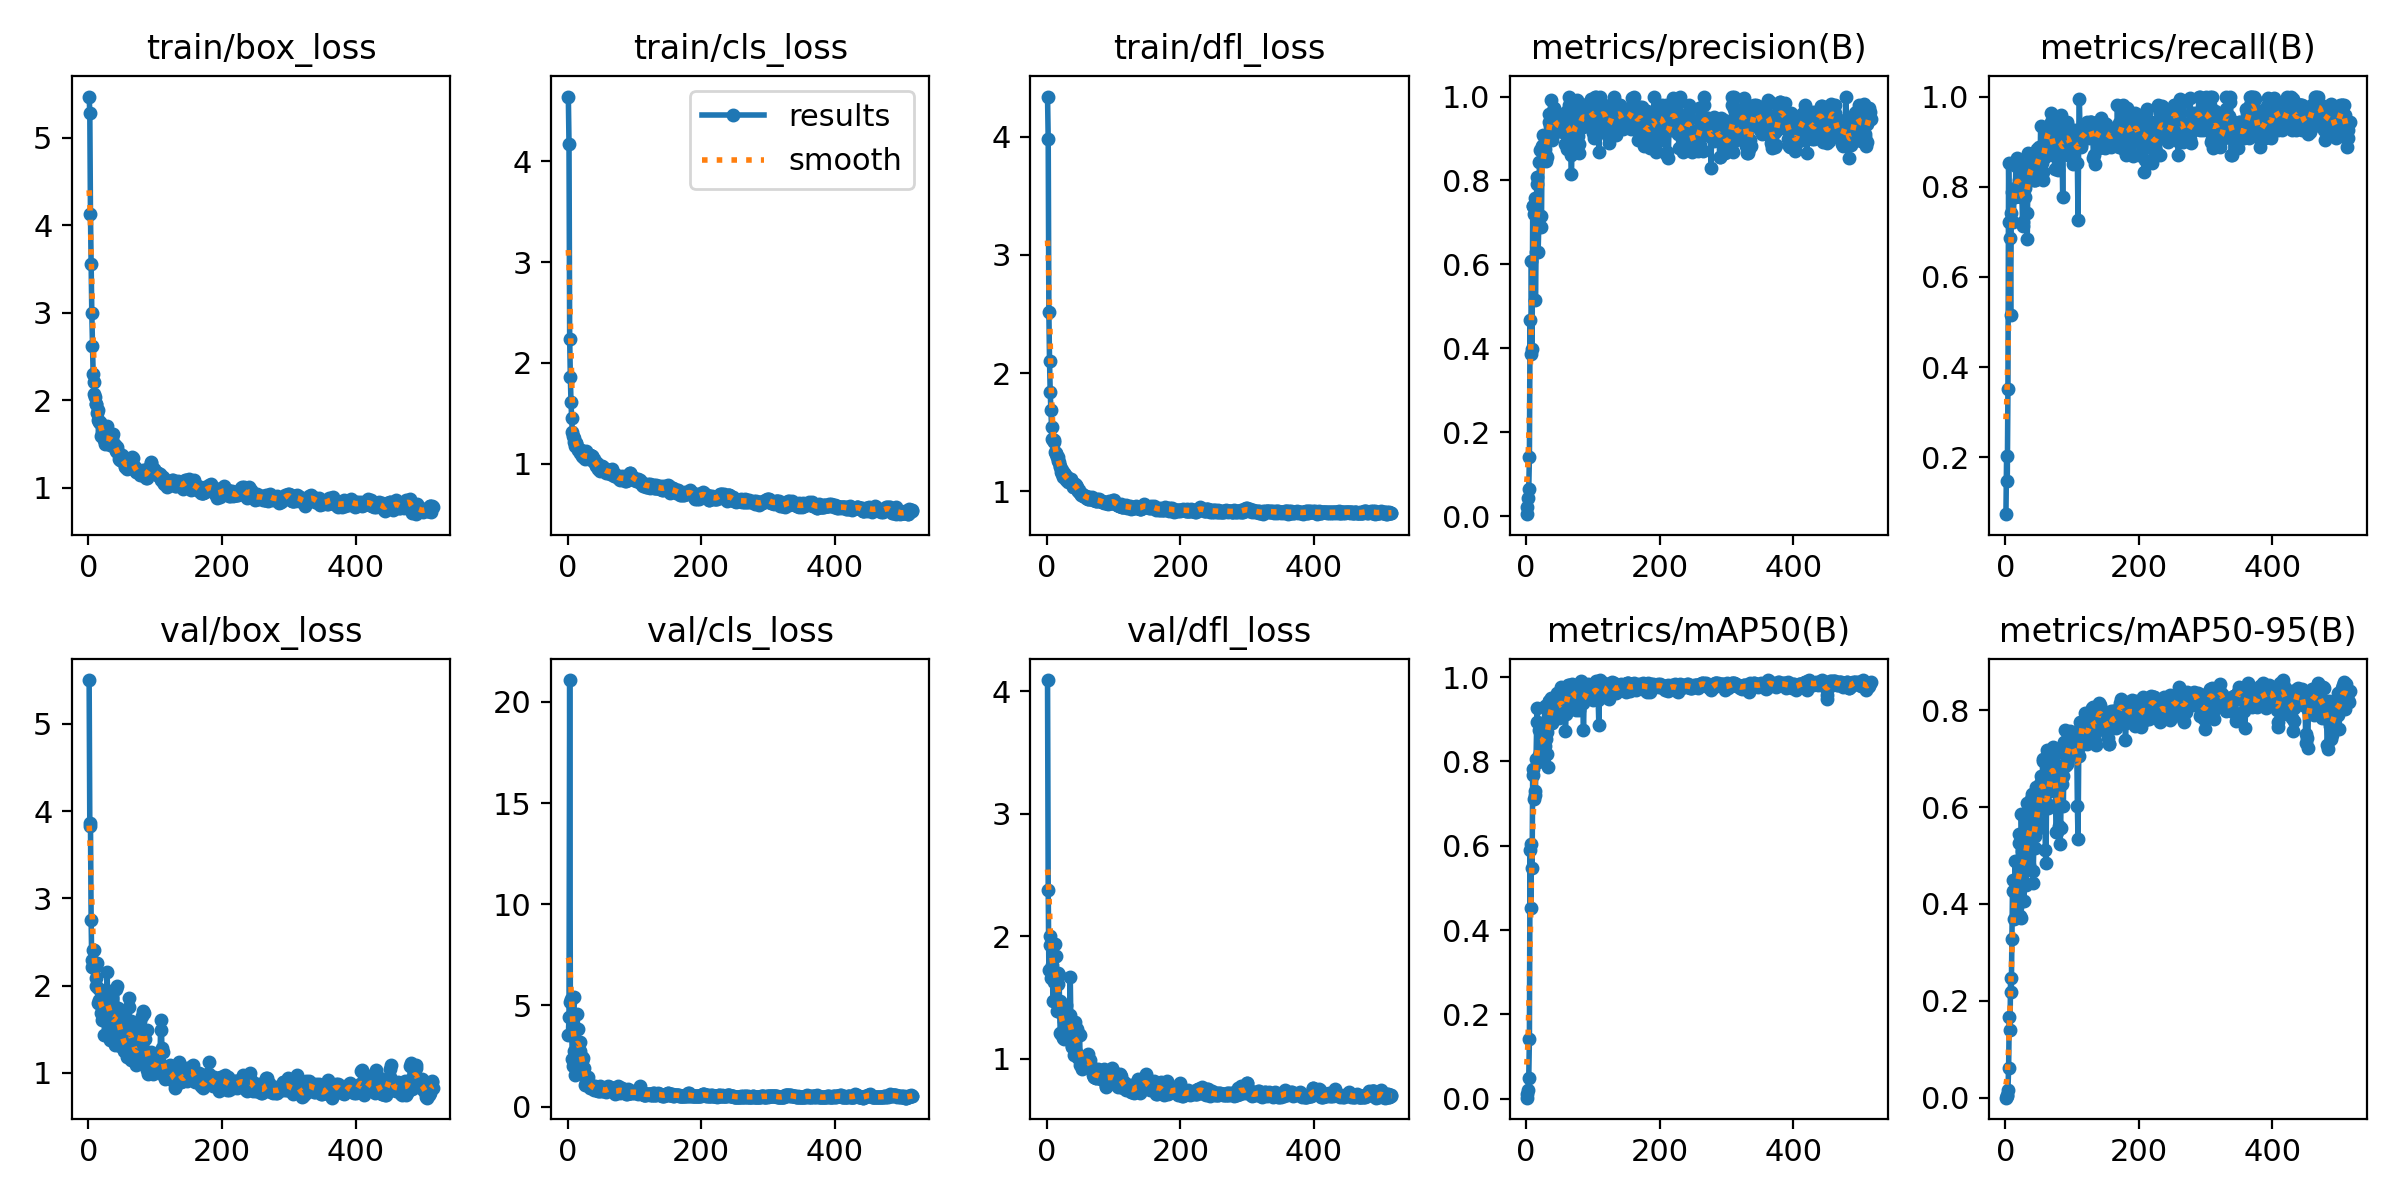

In [27]:
# We can also output some older school graphs if the tensor board isn't working for whatever reason...
Image(filename=f'{str(results.save_dir)}/results.png', width=1000)

## 4.1 Visualize the Training Data

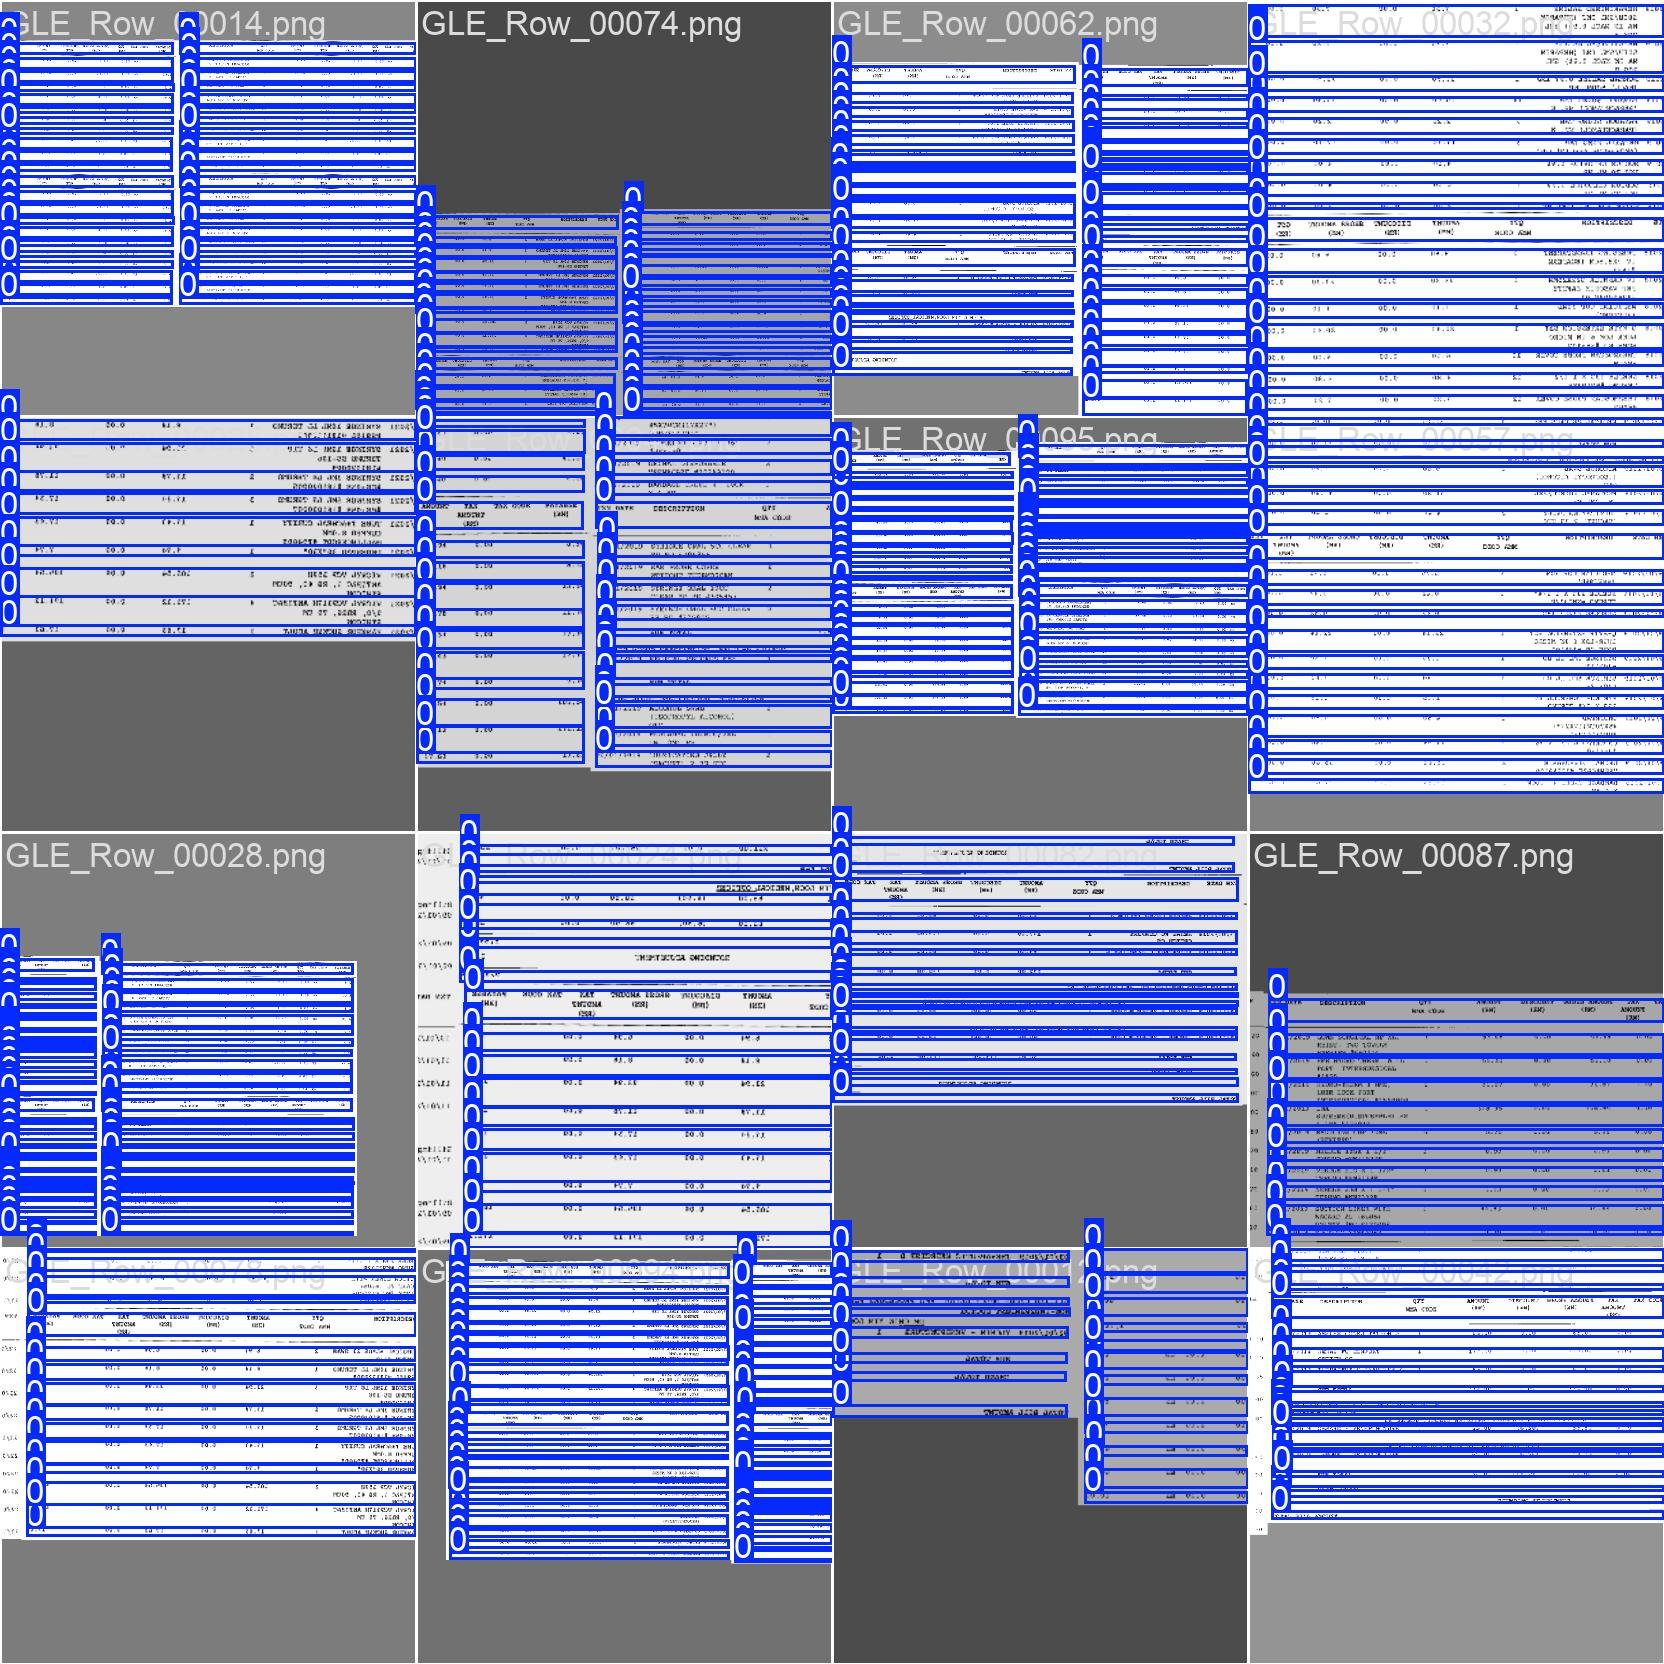

In [28]:
Image(filename=f'{str(results.save_dir)}/train_batch0.jpg', width=900)

## 4.2 Visualize the Labels of Validating Data

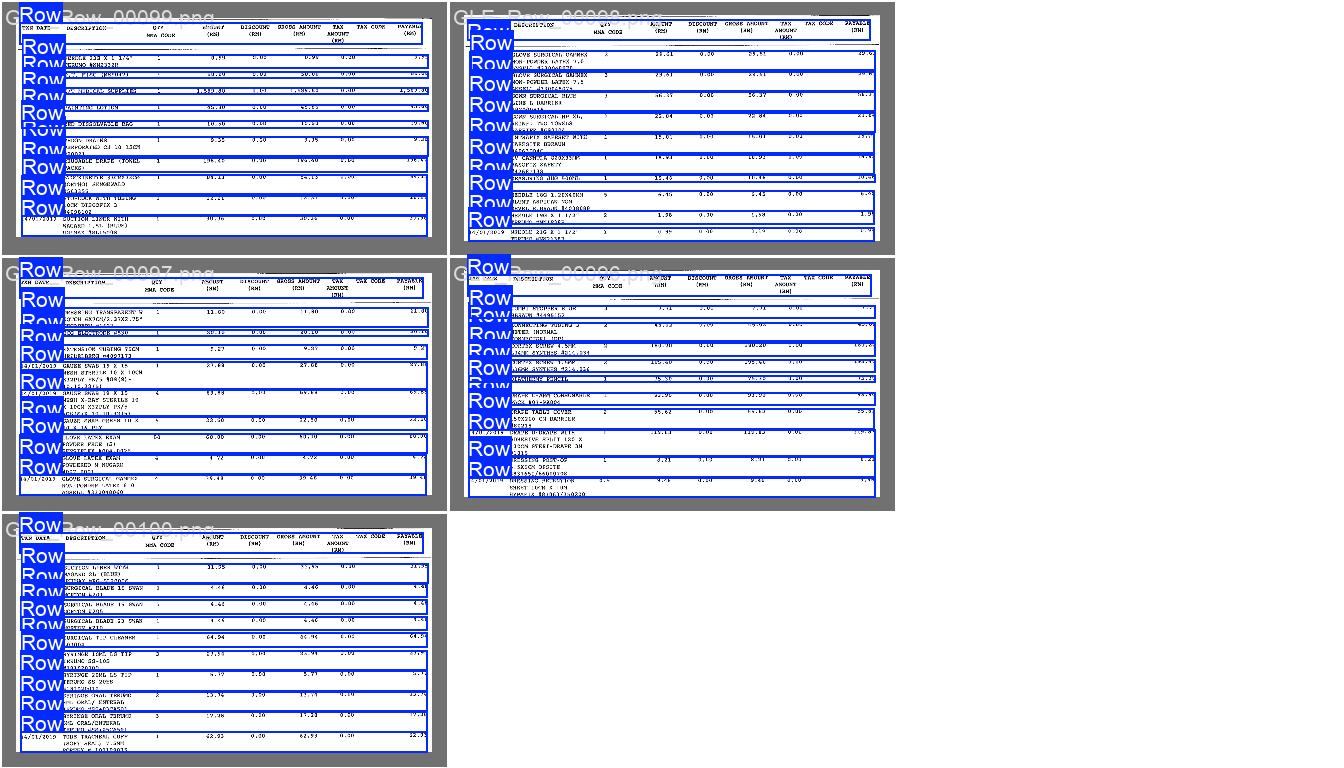

In [29]:
Image(filename=f'{str(results.save_dir)}/val_batch0_labels.jpg', width=900)

## 4.3 Visualize the Predicted Testing Data

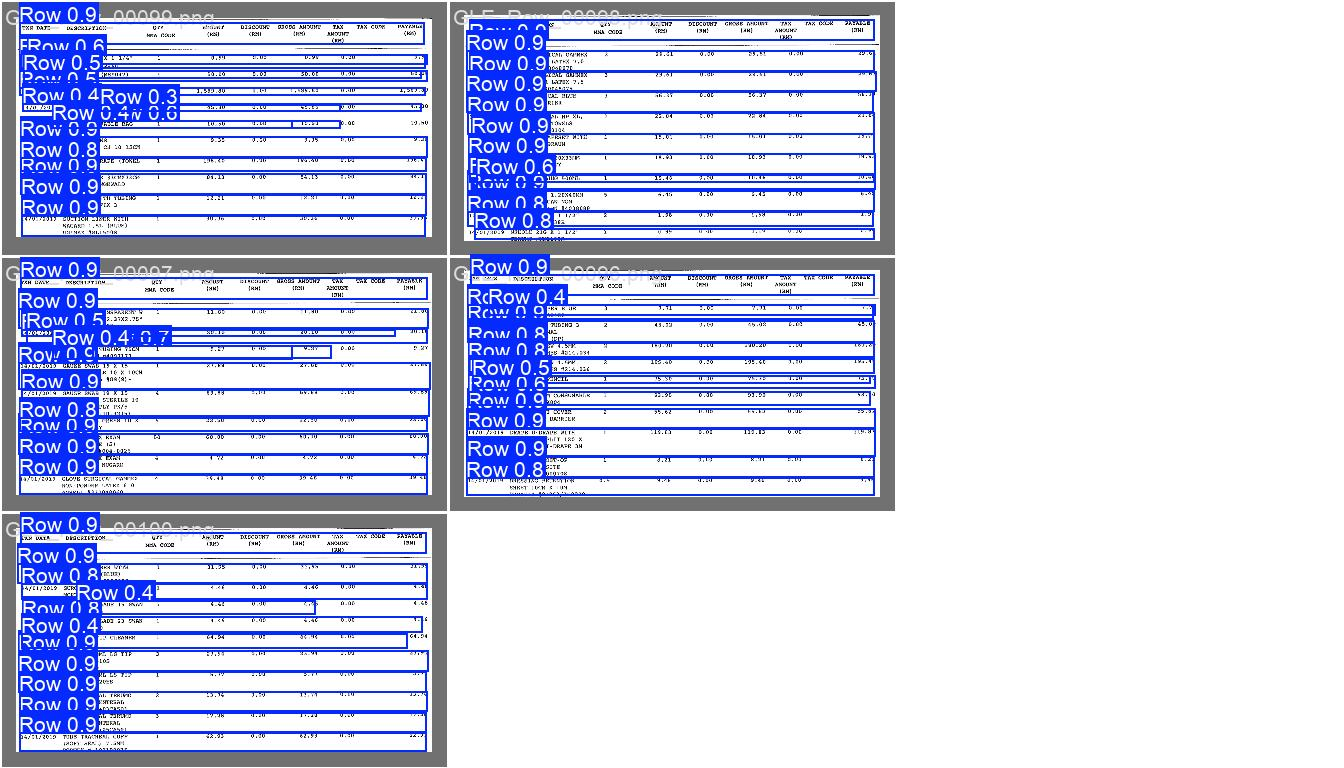

In [30]:
Image(filename=f'{str(results.save_dir)}/val_batch0_pred.jpg', width=900)

# 5 Run Inference  With Trained Weights
Run inference with a pretrained checkpoint on contents of `test/images` folder downloaded from Roboflow.


In [31]:
source = 'data/GLE_Row_test'
model = YOLO(f'{str(results.save_dir)}/weights/best.pt')
# model = YOLO(f'runs/detect/train/weights/best.pt')

# model = YOLO('best.pt')

# deskewer = DataAugmentation.Deskew(source)
# deskewer.processor()

prediction = model.predict(source=source, save=True, imgsz=416, iou=0.25, conf=0.9)


image 1/24 C:\Users\CP1\Desktop\GLE-Billing\data\GLE_Row_test\GLE_Row_00301.png: 256x416 1 Row, 24.2ms
image 2/24 C:\Users\CP1\Desktop\GLE-Billing\data\GLE_Row_test\GLE_Row_00302.png: 224x416 1 Row, 15.5ms
image 3/24 C:\Users\CP1\Desktop\GLE-Billing\data\GLE_Row_test\GLE_Row_00303.png: 224x416 5 Rows, 33.3ms
image 4/24 C:\Users\CP1\Desktop\GLE-Billing\data\GLE_Row_test\GLE_Row_00304.png: 256x416 6 Rows, 33.5ms
image 5/24 C:\Users\CP1\Desktop\GLE-Billing\data\GLE_Row_test\GLE_Row_00305.png: 224x416 4 Rows, 40.9ms
image 6/24 C:\Users\CP1\Desktop\GLE-Billing\data\GLE_Row_test\GLE_Row_00306.png: 224x416 2 Rows, 27.0ms
image 7/24 C:\Users\CP1\Desktop\GLE-Billing\data\GLE_Row_test\GLE_Row_00307.png: 224x416 (no detections), 34.0ms
image 8/24 C:\Users\CP1\Desktop\GLE-Billing\data\GLE_Row_test\GLE_Row_00308.png: 256x416 (no detections), 48.9ms
image 9/24 C:\Users\CP1\Desktop\GLE-Billing\data\GLE_Row_test\GLE_Row_00309.png: 96x416 (no detections), 73.9ms
image 10/24 C:\Users\CP1\Desktop\GLE-Bi

In [32]:
print(results.save_dir)

runs\detect\train14
